# Start Up

Upload the modules

In [1]:
%pip install pandas
%pip install numpy
%pip install -U matplotlib
%pip install scipy
%pip install math
%pip install openpyxl
%pip install scikit-learn
%pip install SALib
%pip install pyDOE
%pip install h5py


import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit, minimize
import math as math
import os 
import warnings
from sklearn.metrics import r2_score 
import copy
import subprocess
from PIL import Image
import scipy.stats as stats
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
from scipy.optimize import fsolve
import matplotlib.pyplot as plt
from SALib.sample import saltelli
from SALib.analyze import sobol
import json
import datetime
from scipy.stats import t
from pyDOE import lhs
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit, minimize
import math as math
import os 
import warnings
import copy
import subprocess
from PIL import Image
from scipy.optimize import approx_fprime
import importlib
import textwrap
import sys





[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
ERROR: Could not find a version that satisfies the requirement math (from versions: none)
ERROR: No matching distribution found for math

[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python3.11 -m 

In [2]:
# path_to_module = os.path.abspath('/Users/yagmurbalabanli/Library/Mobile Documents/com~apple~CloudDocs/Yagmur/studies/study-2-extrusion-model/computational/model_implication/clean_202405')  # Change this to the actual path
# sys.path.append(path_to_module)

import functions_defined_for_fitting_withpenalty
from functions_defined_for_fitting_withpenalty import *
importlib.reload(functions_defined_for_fitting_withpenalty)

<module 'functions_defined_for_fitting_withpenalty' from '/Users/yagmurbalabanli/Library/Mobile Documents/com~apple~CloudDocs/Yagmur/studies/study-2-extrusion-model/computational/model_implication/clean_202405/functions_defined_for_fitting_withpenalty.py'>

# Read Data

Some explaianition of the datasets:

**Freq Sweep** <br /> 
data_exp_frswp = [ [ [freq],[G'],[G''] ] , [ [[freq],[G'],[G''] ] ]<br /> 
                           rep1          ,           rep2<br /> 
data_exp_frswp_avg = [ [ [freq],[G'],[G''] ] ] only the average, freq values coming from the rep1<br /> 
std_frq_swp = [ [std for G1],[std for G2] ]

**Amplitude Sweep** <br /> 
data_exp_frswp = [ [ [ampl],[G'],[G''] ] , [ [ampl],[G'],[G''] ] ]<br /> 
                           rep1          ,           rep2<br /> 
data_exp_frswp_avg = [ [ [ampl],[G'],[G''] ] ] only the average, strain values coming from the rep1<br /> 
std_str_swp= [ [std for G1],[std for G2] ]

**LAOS** <br /> 
data_exp = [ [ [time],[stress],[strain],[shrate] ] , [ [time],[stress],[strain],[shrate] ], ...,   ] <br /> 
first 2Hz for each strain(7), replicates contunie in series, then 4Hz each strain(7) and replicates<br /> 
data_exp_avg =  the same above but replicates averaged, hence only one set of strain amplitudes(7) at 2Hz then 4Hz (14 elements total with 4 subseries each) <br /> 
std_all = array containgin std dev in strain for each  amplitude


**Stress Growth** <br /> 
15 shear rates, followed by 15 replictaes.<br /> 
Each element of "data_exp_stgrw" contains 3 sub elements: time, strain, shear rate, each 99 elements<br /> 
"data_exp_stgrw_avg" contains average of replictaes, the same format with 15 averaged values. The strain and time were extractedfrom the first replicate. <br /> 
std_grw = has 15 elements each  containing 99 elements for each of the stress value collected at a certain time/strain for wach given shear rate

## Freq Sweep

### Viscoelastic moduli

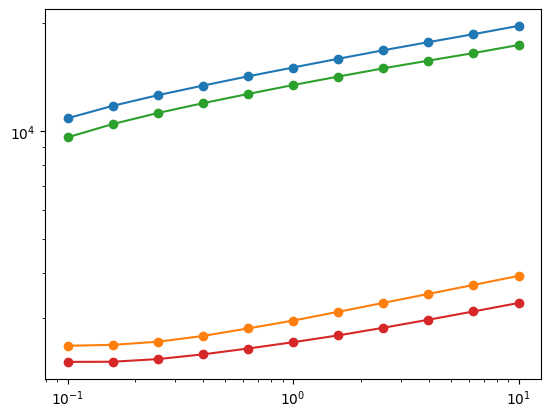

In [3]:
#   Inputs
n_header= 81 #header rows just from the begining to the first data
n_rows=11 #number of data points in the measurement
rows_btw_data = 77 #number20 of rows between two measurements
header_list=['Meas. Pts.',	'Frequency',	'Storage Modulus',\
             	'Loss Modulus',	'Damping Factor',	'Complex Viscosity',	'Deflection Angle',	'Torque']
what_to_collect_time_dep= [ 'Frequency', 'Storage Modulus','Loss Modulus', 'Complex Viscosity'  ]
what_to_collect_single_val = []
path_read="/Users/yagmurbalabanli/Library/Mobile Documents/com~apple~CloudDocs/Yagmur/studies/study-2-extrusion-model/computational/model_implication/experimental_data/2024-08-06/20240905_P60.xlsx"
sheet_name = ['freq_sweep']

sample_list = ['01-frswp-P60-0.60-1', \
               '02-frswp-P60-0.60-2']    

#   Function
data_exp_frswp = read_data1(n_header, n_rows, header_list, what_to_collect_time_dep,what_to_collect_single_val,\
               path_read, sheet_name, sample_list, rows_btw_data)

#frequency and VE moduli
plt.loglog(data_exp_frswp[0][0], data_exp_frswp[0][1], marker='o')
plt.loglog(data_exp_frswp[0][0], data_exp_frswp[0][2], marker='o')
plt.loglog(data_exp_frswp[1][0], data_exp_frswp[1][1], marker='o')
plt.loglog(data_exp_frswp[1][0], data_exp_frswp[1][2], marker='o')


In [4]:
# # Add zeroth elements as text annotations
# fitpar_freqswp_complvis_0 = fitpar_freqswp_complvis[1]
# fitpar_freqswp_G1_0 = fitpar_freqswp_G1[1]
# fitpar_freqswp_G2_0 = fitpar_freqswp_G2[1]

# plt.loglog(data_exp_frswp[0][0], data_exp_frswp[0][1], marker='o', linewidth=0)
# plt.loglog(data_exp_frswp[0][0], data_exp_frswp[0][2], marker='o', linewidth=0)
# plt.loglog(data_exp_frswp[0][0], data_exp_frswp[0][3], marker='o', linewidth=0)

# # Generate models using fitted parameters
# model_fitpar_freqswp_complvis = power_law(data_exp_frswp[0][0], fitpar_freqswp_complvis[0], fitpar_freqswp_complvis[1])
# model_fitpar_freqswp_G1 = power_law(data_exp_frswp[0][0], fitpar_freqswp_G1[0], fitpar_freqswp_G1[1])
# model_fitpar_freqswp_G2 = power_law(data_exp_frswp[0][0], fitpar_freqswp_G2[0], fitpar_freqswp_G2[1])

# # Plot the fitted models
# plt.loglog(data_exp_frswp[0][0], model_fitpar_freqswp_complvis, linewidth=1, color='black', label="Model Complvis")
# plt.loglog(data_exp_frswp[0][0], model_fitpar_freqswp_G1, linewidth=1, color='red', label="Model G1")
# plt.loglog(data_exp_frswp[0][0], model_fitpar_freqswp_G2, linewidth=1, color='blue', label="Model G2")

# # Add the zeroth elements of the fitted parameters as text on the plot
# # Choose appropriate positions based on your data ranges for better visibility
# plt.text(2e1, 1e4, f'G1: {fitpar_freqswp_G1_0:.2f}', color='red')  # Adjust the position (1e1, 1e3) based on your data
# plt.text(2e1, 7e3, f'G2: {fitpar_freqswp_G2_0:.2f}', color='blue')  # Adjust the position (1e1, 1e2)
# plt.text(2e1, 5e3, f'$\eta*$: {fitpar_freqswp_complvis_0:.2f}', color='black')  # Adjust the position (1e1, 1e1)

# # Label the axes
# plt.xlabel('Frequency (Hz)')
# plt.ylabel("G', G'', $\eta*$ ")

# # Add legend and show the plot
# plt.legend()
# plt.show()


Average the replicates

[[10214.0, 11090.0, 11890.0, 12655.0, 13430.0, 14220.0, 15030.0, 15860.0, 16690.0, 17545.0, 18495.0], [2386.5, 2395.0, 2440.0, 2524.0, 2636.0, 2759.5, 2902.5, 3062.5, 3235.0, 3420.5, 3619.5]]
[[626.0, 650.0, 680.0, 715.0, 760.0, 800.0, 860.0, 920.0, 990.0, 1065.0, 1135.0], [123.5, 130.0, 136.0, 149.0, 170.0, 191.5, 219.5, 244.5, 268.0, 290.5, 314.5]]
[[[0.1, 0.1585, 0.2512, 0.3981, 0.631, 1.0, 1.585, 2.512, 3.981, 6.31, 10.0], [10214.0, 11090.0, 11890.0, 12655.0, 13430.0, 14220.0, 15030.0, 15860.0, 16690.0, 17545.0, 18495.0], [2386.5, 2395.0, 2440.0, 2524.0, 2636.0, 2759.5, 2902.5, 3062.5, 3235.0, 3420.5, 3619.5]]]


<ErrorbarContainer object of 3 artists>

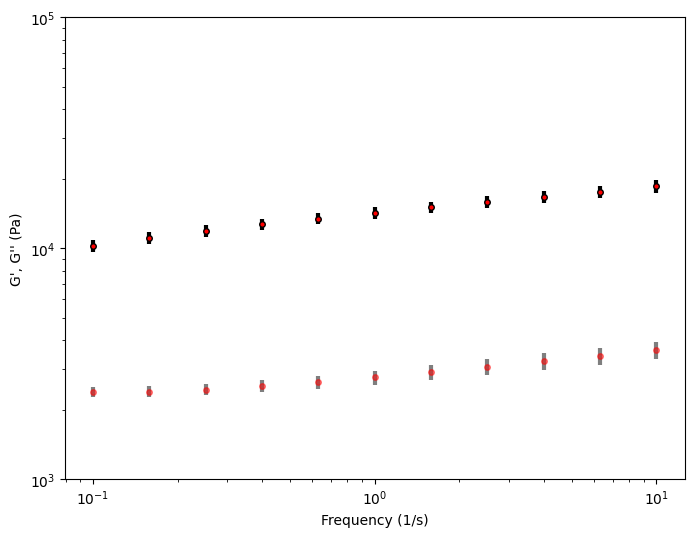

In [5]:
G1rep1 = data_exp_frswp[0][1]
G1rep2 = data_exp_frswp[1][1]

G2rep1 = data_exp_frswp[0][2]
G2rep2 = data_exp_frswp[1][2]

avg = [[],[]]
std_freq_swp = [[],[]]
for i in range(0,len(G1rep1)):
    avg[0].append(np.average([G1rep1[i], G1rep2[i]]))
    avg[1].append(np.average([G2rep1[i], G2rep2[i]]))
    std_freq_swp[0].append(np.std([G1rep1[i], G1rep2[i]]))
    std_freq_swp[1].append(np.std([G2rep1[i], G2rep2[i]]))

print(avg)
print(std_freq_swp)
data_exp_frswp_avg = [[]]
for i in range(0,3):
    if i == 0: data_exp_frswp_avg[0].append(data_exp_frswp[0][0])
    if i == 1: data_exp_frswp_avg[0].append(avg[0])
    if i == 2: data_exp_frswp_avg[0].append(avg[1])
print(data_exp_frswp_avg)

# Create a figure and an array of axes with 1 row and 3 columns
fig, axs = plt.subplots(figsize=(8, 6))
axs.set_xscale('log')
axs.set_yscale('log')
color_palette = plt.cm.hsv(np.linspace(0, 1, 10))

axs.set_xlabel('Frequency (1/s)')
axs.set_ylabel("G', G'' (Pa)")

axs.set_ylim(1e3, 1e5)

axs.errorbar(data_exp_frswp_avg[0][0], data_exp_frswp_avg[0][1], yerr=std_freq_swp[0], marker='o', color='red',\
              label='Data 1', markersize=4, linewidth =0, ecolor = 'black', elinewidth=3, markeredgecolor='black')
axs.errorbar(data_exp_frswp_avg[0][0], data_exp_frswp_avg[0][2], yerr=std_freq_swp[1], marker='o', color=color_palette[0],\
              label='Data 1', markersize=4, linewidth =0, ecolor = 'black', elinewidth=3, alpha =0.5)




### Waveform Data

4


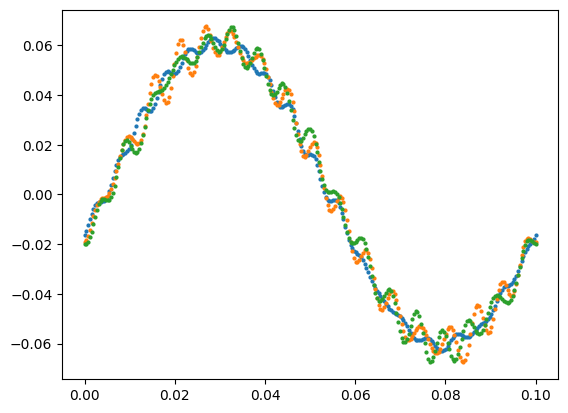

In [6]:
#   Inputs
n_header= 82 #header rows just from the begining to the first data
n_rows=257*11 #number of data points in the measurement
rows_btw_data = 77 #number of rows between two measurements
header_list=['Meas. Pts.',	'Frequency',	'Angular Frequency',	'Strain',	'Shear Stress', 'Phase Angle', 'Period Time', \
             'Raw Value Strain', 'Raw Value Shear Rate', 'Raw Value Shear Stress']
what_to_collect_time_dep= ['Period Time', 'Raw Value Shear Stress','Raw Value Strain','Raw Value Shear Rate'  ]
what_to_collect_single_val = []
path_read="/Users/yagmurbalabanli/Library/Mobile Documents/com~apple~CloudDocs/Yagmur/studies/study-2-extrusion-model/computational/model_implication/experimental_data/2024-08-06/20240905_P60.xlsx"
sheet_name = ['freq_swp_waveform']

sample_list = ['01-frswp-P60-0.60-1',\
               '02-frswp-P60-0.60-2',\
               '03-frswp-P60-0.60-3']    

#   Function
data_exp_frswp_waveform = read_data(n_header, n_rows, header_list, what_to_collect_time_dep,what_to_collect_single_val,\
               path_read, sheet_name, sample_list, rows_btw_data)

print(len(data_exp_frswp_waveform[0][1]))
#strain stress plot
i=10
plt.plot(data_exp_frswp_waveform[0][0][0][i*257:(i+1)*257], data_exp_frswp_waveform[0][0][3][i*257:(i+1)*257], marker='o', linewidth=0, markersize=2)
plt.plot(data_exp_frswp_waveform[0][1][0][i*257:(i+1)*257], data_exp_frswp_waveform[0][1][3][i*257:(i+1)*257], marker='o', linewidth=0, markersize=2)
plt.plot(data_exp_frswp_waveform[0][2][0][i*257:(i+1)*257], data_exp_frswp_waveform[0][2][3][i*257:(i+1)*257], marker='o', linewidth=0, markersize=2)

4


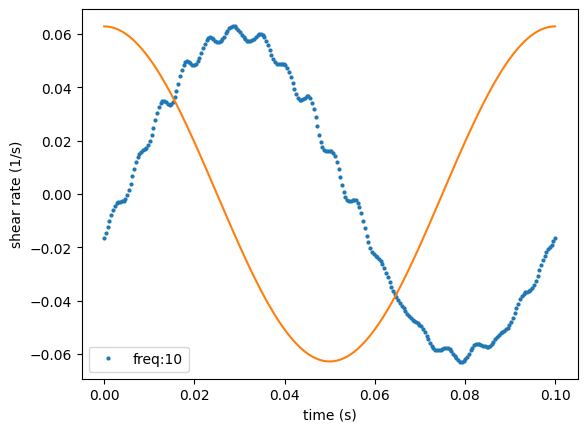

In [7]:
#   Inputs
n_header= 82 #header rows just from the begining to the first data
n_rows=257*11 #number of data points in the measurement
rows_btw_data = 77 #number of rows between two measurements
header_list=['Meas. Pts.',	'Frequency',	'Angular Frequency',	'Strain',	'Shear Stress', 'Phase Angle', 'Period Time', \
             'Raw Value Strain', 'Raw Value Shear Rate', 'Raw Value Shear Stress']
what_to_collect_time_dep= ['Period Time', 'Raw Value Shear Stress','Raw Value Strain','Raw Value Shear Rate'  ]
what_to_collect_single_val = []
path_read="/Users/yagmurbalabanli/Library/Mobile Documents/com~apple~CloudDocs/Yagmur/studies/study-2-extrusion-model/computational/model_implication/experimental_data/2024-08-06/20240905_P60.xlsx"
sheet_name = ['freq_swp_waveform']

sample_list = ['01-frswp-P60-0.60-1',\
               '02-frswp-P60-0.60-2',\
               '03-frswp-P60-0.60-3']    

freqvals_frfit= [ 0.1, 0.1585, 0.2512, 0.3981, 0.631, 1, 1.585, 2.512, 3.981, 6.31, 10]
#   Function
data_exp_frswp_waveform = read_data(n_header, n_rows, header_list, what_to_collect_time_dep,what_to_collect_single_val,\
               path_read, sheet_name, sample_list, rows_btw_data)

print(len(data_exp_frswp_waveform[0][1]))
#strain stress plot


l=10
plt.plot(data_exp_frswp_waveform[0][0][0][l*257:(l+1)*257], data_exp_frswp_waveform[0][0][3][l*257:(l+1)*257],\
          marker='o', linewidth=0, markersize=2, label=f'freq:{freqvals_frfit[l]}')
plt.legend()
plt.xlabel('time (s)')
plt.ylabel('shear rate (1/s)')

t = np.linspace(0,1/freqvals_frfit[l],257)
strains = []
shrates =[]
for elem in t:
    shrate = 0.1/100 * freqvals_frfit[l]*2*math.pi * np.cos(freqvals_frfit[l]*elem*2*math.pi)
    
    strain = 0.1/100 * np.sin(freqvals_frfit[l]*elem*2*math.pi)
    strains.append(strain)
    shrates.append(shrate)
#plt.plot(t, strains)
plt.plot(t, shrates)


Average the replicates

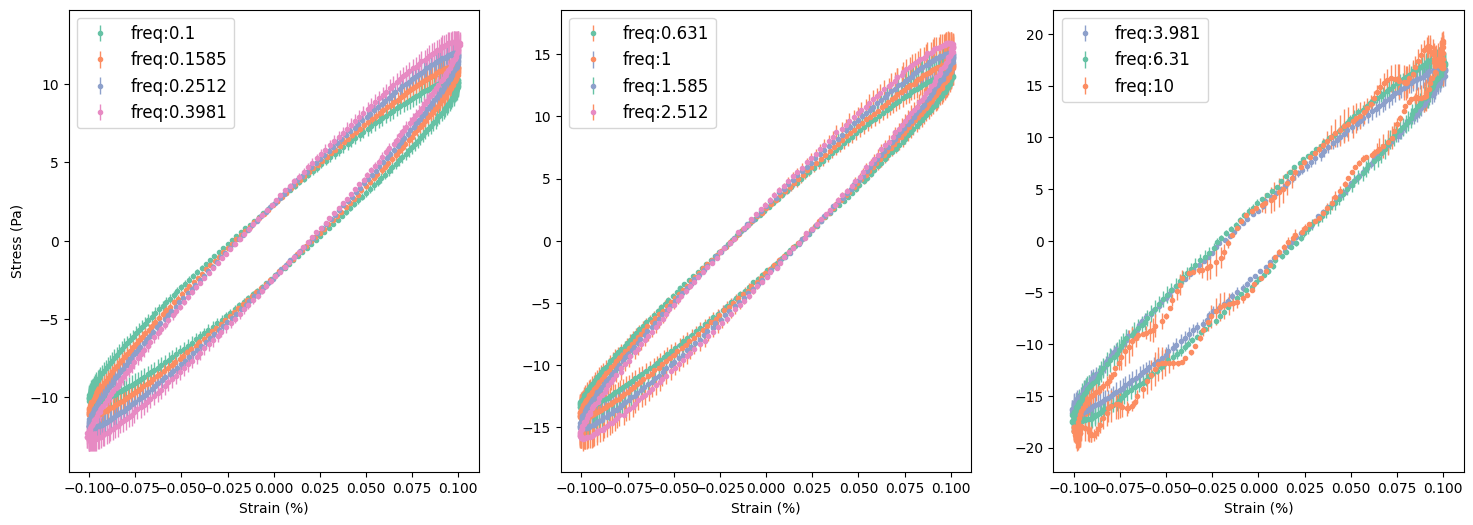

In [8]:
rep1 = data_exp_frswp_waveform[0][0][1]
rep2 = data_exp_frswp_waveform[0][1][1]

avg = []
std_freqwaveform = []
for i in range(0,len(rep1)):
    avg.append(np.average([rep1[i], rep2[i]]))
    std_freqwaveform.append(np.std([rep1[i], rep2[i]]))


elem1 = data_exp_frswp_waveform[0][0][0]
elem2 = avg
elem3 = data_exp_frswp_waveform[0][0][2]
elem4 = data_exp_frswp_waveform[0][0][3]
data_exp_frswp_waveform_avg = [[[elem1, elem2, elem3, elem4]]]

fig, axs = plt.subplots(1,3,figsize=(18, 6))
color_palette = plt.cm.Set2(np.linspace(0, 1, 9))

axs[0].set_xlabel('Strain (%)')
axs[1].set_xlabel('Strain (%)')
axs[2].set_xlabel('Strain (%)')
axs[0].set_ylabel("Stress (Pa)")

# plt.plot(data_exp_frswp_waveform[0][0][2], data_exp_frswp_waveform[0][0][1], marker='o', linewidth=0, markersize=2)
# plt.plot(data_exp_frswp_waveform[0][1][2], data_exp_frswp_waveform[0][1][1], marker='o', linewidth=0, markersize=2)

freqvals_frfit= [ 0.1, 0.1585, 0.2512, 0.3981, 0.631, 1, 1.585, 2.512, 3.981, 6.31, 10]
for i in range(0,11):
    x= np.multiply(data_exp_frswp_waveform_avg[0][0][2][i*257:(i+1)*257],100)
    if i <= 3:
        axs[0].errorbar(x, data_exp_frswp_waveform_avg[0][0][1][i*257:(i+1)*257], yerr=std_freqwaveform[i*257:(i+1)*257],\
             marker='o', linewidth=0, markersize=3, color=color_palette[i%4], ecolor=color_palette[i], elinewidth = 1,
             label=f'freq:{freqvals_frfit[i]}')
    elif i < 8:
        axs[1].errorbar(x, data_exp_frswp_waveform_avg[0][0][1][i*257:(i+1)*257], yerr=std_freqwaveform[i*257:(i+1)*257],\
             marker='o', linewidth=0, markersize=3, color=color_palette[i%4], ecolor=color_palette[i%3], elinewidth = 1,
             label=f'freq:{freqvals_frfit[i]}')
    else:
        axs[2].errorbar(x, data_exp_frswp_waveform_avg[0][0][1][i*257:(i+1)*257], yerr=std_freqwaveform[i*257:(i+1)*257],\
             marker='o', linewidth=0, markersize=3, color=color_palette[i%3], ecolor=color_palette[i%3], elinewidth = 1,
             label=f'freq:{freqvals_frfit[i]}')
        
axs[0].legend(fontsize=12)
axs[1].legend(fontsize=12)
axs[2].legend(fontsize=12)


## Amplitude Sweep

[[[0.09727, 0.1706, 0.2978, 0.5291, 0.9432, 1.684, 3.009, 5.387, 9.658, 17.3, 30.74, 54.19, 95.49, 168.7, 298.4, 527.8, 935.3], [15780.0, 15660.0, 15430.0, 15040.0, 14460.0, 13630.0, 12500.0, 11010.0, 9164.0, 7048.0, 4984.0, 3289.0, 2035.0, 1164.0, 600.5, 289.2, 134.4], [3242.0, 3241.0, 3252.0, 3278.0, 3317.0, 3352.0, 3368.0, 3337.0, 3235.0, 3019.0, 2673.0, 2254.0, 1842.0, 1451.0, 1051.0, 684.3, 415.3]], [[0.09722, 0.1705, 0.2976, 0.5287, 0.9423, 1.682, 3.005, 5.378, 9.64, 17.26, 30.71, 54.19, 95.51, 168.7, 298.4, 528.4, 936.5], [15780.0, 15650.0, 15430.0, 15050.0, 14500.0, 13700.0, 12630.0, 11210.0, 9424.0, 7348.0, 5271.0, 3519.0, 2183.0, 1242.0, 636.0, 309.4, 146.7], [3226.0, 3227.0, 3240.0, 3266.0, 3303.0, 3331.0, 3344.0, 3316.0, 3225.0, 3032.0, 2706.0, 2286.0, 1864.0, 1457.0, 1049.0, 696.7, 434.6]]]


Text(0, 0.5, "G', G''[Pa]")

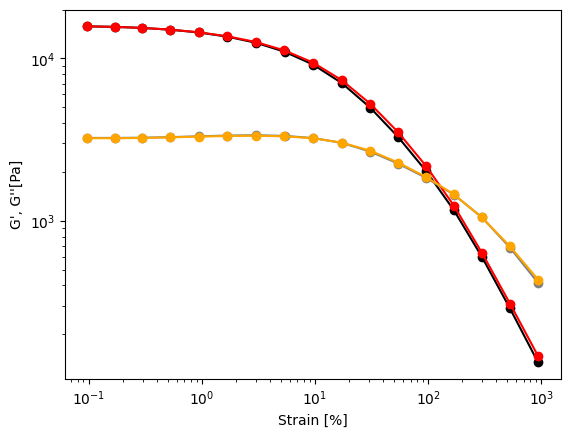

In [9]:
#   Inputs
n_header= 81 #header rows just from the begining to the first data
n_rows=17 #number of data points in the measurement
rows_btw_data = 77 #number20 of rows between two measurements
header_list=['Meas. Pts.',	'Strain',	'Shear Stress',	'Frequency',	'Storage Modulus',\
             	'Loss Modulus',	'Damping Factor',	'Complex Viscosity',	'Deflection Angle',	'Torque']
what_to_collect_time_dep= [ 'Strain', 'Storage Modulus','Loss Modulus'  ]
what_to_collect_single_val = []
path_read="/Users/yagmurbalabanli/Library/Mobile Documents/com~apple~CloudDocs/Yagmur/studies/study-2-extrusion-model/computational/model_implication/experimental_data/2024-08-06/20240905_P60.xlsx"
sheet_name = ['ampl_sweep']

sample_list = ['01-strswp-P60-0.60-1', 
               '02-strswp-P60-0.60-2']    

#   Function
data_exp_strswp = read_data1(n_header, n_rows, header_list, what_to_collect_time_dep,what_to_collect_single_val,\
               path_read, sheet_name, sample_list, rows_btw_data)

print(data_exp_strswp)

plt.loglog(data_exp_strswp[0][0], data_exp_strswp[0][1], marker='o', color='black')
plt.loglog(data_exp_strswp[0][0], data_exp_strswp[0][2], marker='o', color='gray')
plt.loglog(data_exp_strswp[1][0], data_exp_strswp[1][1], marker='o', color='red')
plt.loglog(data_exp_strswp[1][0], data_exp_strswp[1][2], marker='o', color='orange')

plt.xlabel('Strain [%]')
plt.ylabel("G', G''[Pa]")

Average the replicates

[[15780.0, 15655.0, 15430.0, 15045.0, 14480.0, 13665.0, 12565.0, 11110.0, 9294.0, 7198.0, 5127.5, 3404.0, 2109.0, 1203.0, 618.25, 299.29999999999995, 140.55], [3234.0, 3234.0, 3246.0, 3272.0, 3310.0, 3341.5, 3356.0, 3326.5, 3230.0, 3025.5, 2689.5, 2270.0, 1853.0, 1454.0, 1050.0, 690.5, 424.95000000000005]]
[[0.0, 5.0, 0.0, 5.0, 20.0, 35.0, 65.0, 100.0, 130.0, 150.0, 143.5, 115.0, 74.0, 39.0, 17.75, 10.099999999999994, 6.1499999999999915], [8.0, 7.0, 6.0, 6.0, 7.0, 10.5, 12.0, 10.5, 5.0, 6.5, 16.5, 16.0, 11.0, 3.0, 1.0, 6.2000000000000455, 9.650000000000006]]
[[[0.09727, 0.1706, 0.2978, 0.5291, 0.9432, 1.684, 3.009, 5.387, 9.658, 17.3, 30.74, 54.19, 95.49, 168.7, 298.4, 527.8, 935.3], [15780.0, 15655.0, 15430.0, 15045.0, 14480.0, 13665.0, 12565.0, 11110.0, 9294.0, 7198.0, 5127.5, 3404.0, 2109.0, 1203.0, 618.25, 299.29999999999995, 140.55], [3234.0, 3234.0, 3246.0, 3272.0, 3310.0, 3341.5, 3356.0, 3326.5, 3230.0, 3025.5, 2689.5, 2270.0, 1853.0, 1454.0, 1050.0, 690.5, 424.95000000000005]]]

<ErrorbarContainer object of 3 artists>

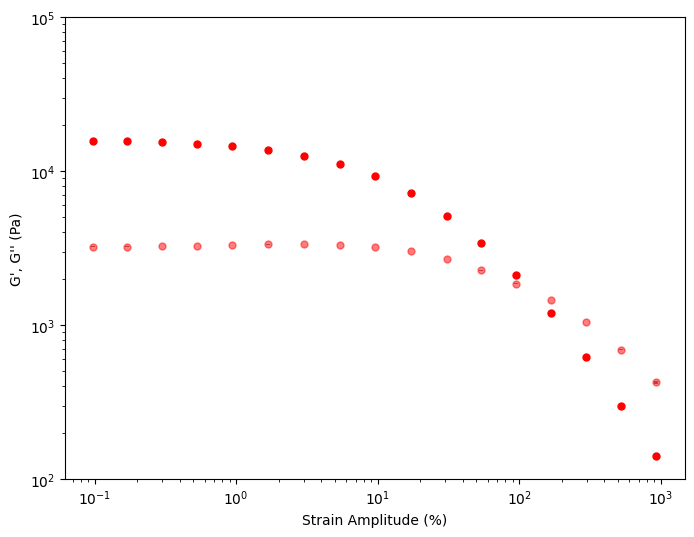

In [10]:
G1rep1 = data_exp_strswp[0][1]
G1rep2 = data_exp_strswp[1][1]

G2rep1 = data_exp_strswp[0][2]
G2rep2 = data_exp_strswp[1][2]

avg = [[],[]]
std_str_swp = [[],[]]
for i in range(0,len(G1rep1)):
    avg[0].append(np.average([G1rep1[i], G1rep2[i]]))
    avg[1].append(np.average([G2rep1[i], G2rep2[i]]))
    std_str_swp[0].append(np.std([G1rep1[i], G1rep2[i]]))
    std_str_swp[1].append(np.std([G2rep1[i], G2rep2[i]]))

print(avg)
print(std_str_swp)
data_exp_strswp_avg = [[]]
for i in range(0,3):
    if i == 0: data_exp_strswp_avg[0].append(data_exp_strswp[0][0])
    if i == 1: data_exp_strswp_avg[0].append(avg[0])
    if i == 2: data_exp_strswp_avg[0].append(avg[1])
print(data_exp_strswp_avg)

# Create a figure and an array of axes with 1 row and 3 columns
fig, axs = plt.subplots(figsize=(8, 6))
axs.set_xscale('log')
axs.set_yscale('log')
color_palette = plt.cm.hsv(np.linspace(0, 1, 10))

axs.set_xlabel('Strain Amplitude (%)')
axs.set_ylabel("G', G'' (Pa)")

axs.set_ylim(1e2, 1e5)

axs.errorbar(data_exp_strswp_avg[0][0], data_exp_strswp_avg[0][1], yerr=std_str_swp[0], marker='o', color=color_palette[0],\
              label='Data 1', markersize=5, linewidth =0, ecolor = 'black', elinewidth=3)
axs.errorbar(data_exp_strswp_avg[0][0], data_exp_strswp_avg[0][2], yerr=std_str_swp[1], marker='o', color=color_palette[0],\
              label='Data 1', markersize=5, linewidth =0, ecolor = 'black', elinewidth=3, alpha =0.5)




## LAOS

In [11]:
#   Inputs
n_header= 121 #header rows just from the begining to the first data
n_rows=257*5 #number of data points in the measurement
rows_btw_data = 77 #number of rows between two measurements
header_list=['Meas. Pts.',	'Frequency',	'Angular Frequency',	'Strain',	'Shear Stress', 'Period Time',	'Phase Angle', 'Raw Value Shear Rate', 'Raw Value Shear Stress',\
             'Raw Value Strain', 'Raw Value Torque']
what_to_collect_time_dep= ['Period Time', 'Raw Value Shear Stress','Raw Value Strain','Raw Value Shear Rate'  ]
what_to_collect_single_val = []
path_read="/Users/yagmurbalabanli/Library/Mobile Documents/com~apple~CloudDocs/Yagmur/studies/study-2-extrusion-model/computational/model_implication/experimental_data/2024-08-06/20240905_P60.xlsx"
sheet_name = ['laos_upd']

sample_list = ['01-laos-P60-0.60-1.2-freq2.0',\
               '02-laos-P60-0.60-1.0-freq2.0',\
               '03-laos-P60-0.60-0.5-freq2.0',\
               '04-laos-P60-0.60-0.3-freq2.0',\
               '05-laos-P60-0.60-0.15-freq2.0',\
               '06-laos-P60-0.60-0.1-freq2.0',\
               '07-laos-P60-0.60-0.05-freq2.0',\
               '08-laos-P60-0.60-1.2-freq2.0-2',\
               '09-laos-P60-0.60-1.0-freq2.0-2',\
               '10-laos-P60-0.60-0.5-freq2.0-2',\
               '11-laos-P60-0.60-0.3-freq2.0-2',\
               '12-laos-P60-0.60-0.1-freq2.0-2',\
               '13-laos-P60-0.60-0.15-freq2.0-2',\
               '14-laos-P60-0.60-0.05-freq2.0-2',\
               '15-laos-P60-0.60-1.2-freq2.0-2',\
               '16-laos-P60-0.60-1.0-freq4.0',\
               '17-laos-P60-0.60-0.5-freq4.0',\
               '18-laos-P60-0.60-0.3-freq4.0',\
               '19-laos-P60-0.60-0.15-freq4.0',\
               '20-laos-P60-0.60-0.1-freq4.0',\
               '21-laos-P60-0.60-0.05-freq4.0',\
               '22-laos-P60-0.60-1.2-freq4.0-2',\
               '23-laos-P60-0.60-1.0-freq4.0-2',\
               '24-laos-P60-0.60-0.5-freq4.0-2',\
               '25-laos-P60-0.60-0.3-freq4.0-2',\
               '26-laos-P60-0.60-0.15-freq4.0-2',\
               '27-laos-P60-0.60-0.1-freq4.0-2',\
               '28-laos-P60-0.60-0.05-freq4.0-2',\
               '29-laos-P60-0.60-1.2-freq2.0-2',\
               '30-laos-P60-0.60-1.0-freq8.0',\
               '31-laos-P60-0.60-0.5-freq8.0',\
               '32-laos-P60-0.60-0.3-freq8.0',\
               '33-laos-P60-0.60-0.15-freq8.0',\
               '34-laos-P60-0.60-0.1-freq8.0',\
               '35-laos-P60-0.60-0.05-freq8.0',\
               '36-laos-P60-0.60-1.2-freq8.0-2',\
               '37-laos-P60-0.60-1.0-freq8.0-2',\
               '38-laos-P60-0.60-0.5-freq8.0-2',\
               '39-laos-P60-0.60-0.3-freq8.0-2',\
               '40-laos-P60-0.60-0.15-freq8.0-2',\
               '41-laos-P60-0.60-0.1-freq8.0-2',\
               '42-laos-P60-0.60-0.05-freq8.0-2',\
                ]    

#   Function
data_exp, data_single_exp = read_data(n_header, n_rows, header_list, what_to_collect_time_dep,what_to_collect_single_val,\
               path_read, sheet_name, sample_list, rows_btw_data)


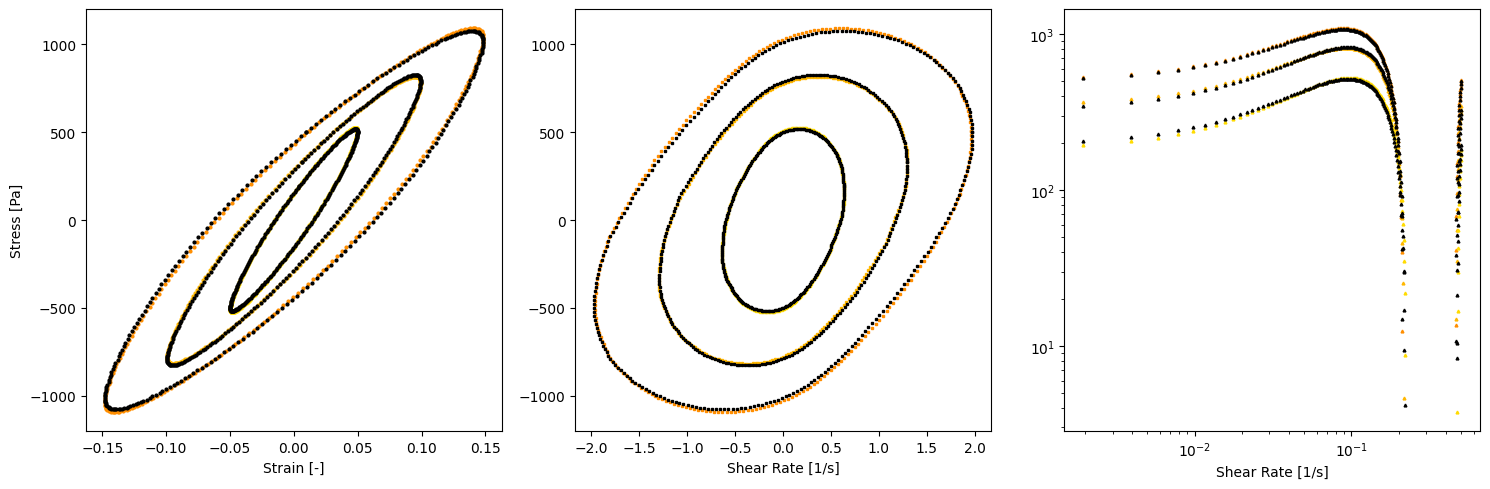

In [12]:
# Create a figure and an array of axes with 1 row and 3 columns
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[2].set_xscale('log')
axs[2].set_yscale('log')
color_palette = plt.cm.hsv(np.linspace(0, 1, 42))

axs[0].set_xlabel('Strain [-]')
axs[1].set_xlabel('Shear Rate [1/s]')
axs[2].set_xlabel('Shear Rate [1/s]')
axs[0].set_ylabel('Stress [Pa]')



for i in range(4,7):

    x1 = data_exp[i][2][-257:]
    y1 = data_exp[i][1][-257:]

    x2 = data_exp[i][3][-257:]
    y2 = data_exp[i][1][-257:]

    x3 = data_exp[i][0][-257:]
    y3 = data_exp[i][1][-257:]

    # Plot data in the first subplot
    axs[0].plot(x1, y1, marker='o', color=color_palette[i], label='Data 1', markersize=2, linewidth =0)

    # Plot data in the second subplot
    axs[1].plot(x2, y2, marker='s', color=color_palette[i], label='Data 2', markersize=2, linewidth =0)

    # Plot data in the third subplot
    axs[2].plot(x3, y3, marker='^', color=color_palette[i], label='Data 3', markersize=2, linewidth =0)


for i in range(11,14):

    x1 = data_exp[i][2][-257:]
    y1 = data_exp[i][1][-257:]

    x2 = data_exp[i][3][-257:]
    y2 = data_exp[i][1][-257:]

    x3 = data_exp[i][0][-257:]
    y3 = data_exp[i][1][-257:]

    # Plot data in the first subplot
    axs[0].plot(x1, y1, marker='o', color='black', label='Data 1', markersize=2, linewidth =0)

    # Plot data in the second subplot
    axs[1].plot(x2, y2, marker='s', color='black', label='Data 2', markersize=2, linewidth =0)

    # Plot data in the third subplot
    axs[2].plot(x3, y3, marker='^', color='black', label='Data 3', markersize=2, linewidth =0)

# Adjust layout for better spacing
plt.tight_layout()

# Display the plots
plt.show()

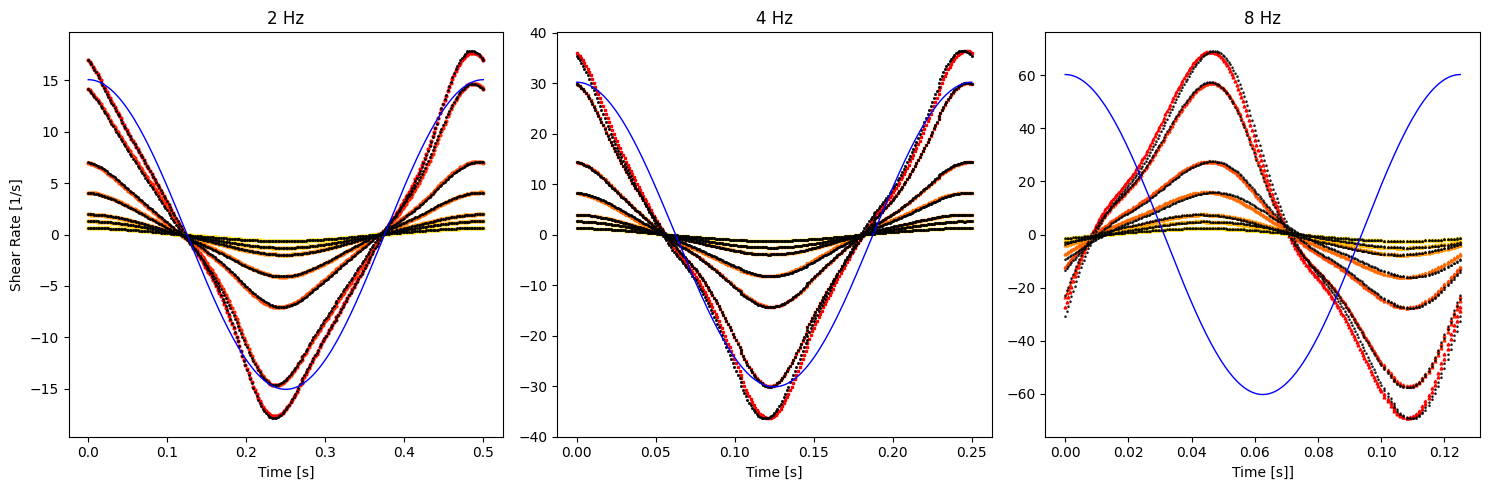

In [13]:
# Create a figure and an array of axes with 1 row and 3 columns
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
color_palette = plt.cm.hsv(np.linspace(0, 1, 42))

axs[0].set_xlabel('Time [s]')
axs[1].set_xlabel('Time [s]')
axs[2].set_xlabel('Time [s]]')
axs[0].set_ylabel('Shear Rate [1/s]')

axs[0].set_title('2 Hz')
axs[1].set_title('4 Hz')
axs[2].set_title('8 Hz')


for i in range(0,7):

    x1 = data_exp[i][0][-257:]
    y1 = data_exp[i][3][-257:]

    x2 = data_exp[i+14][0][-257:]
    y2 = data_exp[i+14][3][-257:]

    x3 = data_exp[i+28][0][-257:]
    y3 = data_exp[i+28][3][-257:]

    # Plot data in the first subplot
    axs[0].plot(x1, y1, marker='o', color=color_palette[i], label='Data 1', markersize=2, linewidth =0)

    # Plot data in the second subplot
    axs[1].plot(x2, y2, marker='s', color=color_palette[i], label='Data 2', markersize=2, linewidth =0)

    # Plot data in the third subplot
    axs[2].plot(x3, y3, marker='^', color=color_palette[i], label='Data 3', markersize=2, linewidth =0)


for i in range(7,14):

    x1 = data_exp[i][0][-257:]
    y1 = data_exp[i][3][-257:]

    x2 = data_exp[i+14][0][-257:]
    y2 = data_exp[i+14][3][-257:]

    x3 = data_exp[i+28][0][-257:]
    y3 = data_exp[i+28][3][-257:]

    # Plot data in the first subplot
    axs[0].plot(x1, y1, marker='o', color='black', label='Data 1', markersize=1, linewidth =0)

    # Plot data in the second subplot
    axs[1].plot(x2, y2, marker='s', color='black', label='Data 2', markersize=1, linewidth =0)

    # Plot data in the third subplot
    axs[2].plot(x3, y3, marker='^', color='black', label='Data 3', markersize=1, linewidth =0)

# Adjust layout for better spacing
plt.tight_layout()


freq = 2
ampl = 120
t = np.linspace(0,1/freq,257)
strains = []
shrates =[]
for elem in t:
    shrate = ampl/100 * freq*2*math.pi * np.cos(freq*elem*2*math.pi)
    
    strain = ampl/100 * np.sin(freq*elem*2*math.pi)
    strains.append(strain)
    shrates.append(shrate)
axs[0].plot(t, shrates, marker='o', color='blue', markersize=0, linewidth =1)

freq = 4
ampl = 120
t = np.linspace(0,1/freq,257)
strains = []
shrates =[]
for elem in t:
    shrate = ampl/100 * freq*2*math.pi * np.cos(freq*elem*2*math.pi)
    
    strain = ampl/100 * np.sin(freq*elem*2*math.pi)
    strains.append(strain)
    shrates.append(shrate)
axs[1].plot(t, shrates, marker='o', color='blue', markersize=0, linewidth =1)

freq = 8
ampl = 120
t = np.linspace(0,1/freq,257)
strains = []
shrates =[]
for elem in t:
    shrate = ampl/100 * freq*2*math.pi * np.cos(freq*elem*2*math.pi)
    
    strain = ampl/100 * np.sin(freq*elem*2*math.pi)
    strains.append(strain)
    shrates.append(shrate)
axs[2].plot(t, shrates, marker='o', color='blue', markersize=0, linewidth =1)


# Display the plots
plt.show()

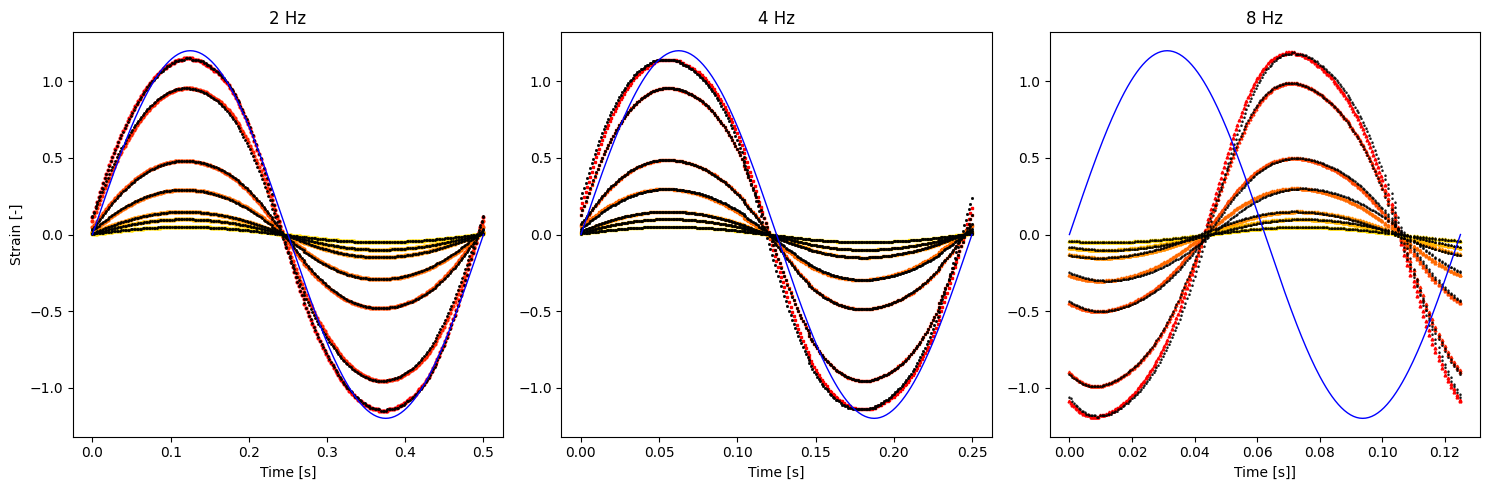

In [14]:
# Create a figure and an array of axes with 1 row and 3 columns
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
color_palette = plt.cm.hsv(np.linspace(0, 1, 42))

axs[0].set_xlabel('Time [s]')
axs[1].set_xlabel('Time [s]')
axs[2].set_xlabel('Time [s]]')
axs[0].set_ylabel('Strain [-]')

axs[0].set_title('2 Hz')
axs[1].set_title('4 Hz')
axs[2].set_title('8 Hz')


for i in range(0,7):

    x1 = data_exp[i][0][-257:]
    y1 = data_exp[i][2][-257:]

    x2 = data_exp[i+14][0][-257:]
    y2 = data_exp[i+14][2][-257:]

    x3 = data_exp[i+28][0][-257:]
    y3 = data_exp[i+28][2][-257:]

    # Plot data in the first subplot
    axs[0].plot(x1, y1, marker='o', color=color_palette[i], label='Data 1', markersize=2, linewidth =0)

    # Plot data in the second subplot
    axs[1].plot(x2, y2, marker='s', color=color_palette[i], label='Data 2', markersize=2, linewidth =0)

    # Plot data in the third subplot
    axs[2].plot(x3, y3, marker='^', color=color_palette[i], label='Data 3', markersize=2, linewidth =0)


for i in range(7,14):

    x1 = data_exp[i][0][-257:]
    y1 = data_exp[i][2][-257:]

    x2 = data_exp[i+14][0][-257:]
    y2 = data_exp[i+14][2][-257:]

    x3 = data_exp[i+28][0][-257:]
    y3 = data_exp[i+28][2][-257:]

    # Plot data in the first subplot
    axs[0].plot(x1, y1, marker='o', color='black', label='Data 1', markersize=1, linewidth =0)

    # Plot data in the second subplot
    axs[1].plot(x2, y2, marker='s', color='black', label='Data 2', markersize=1, linewidth =0)

    # Plot data in the third subplot
    axs[2].plot(x3, y3, marker='^', color='black', label='Data 3', markersize=1, linewidth =0)

# Adjust layout for better spacing
plt.tight_layout()


freq = 2
ampl = 120
t = np.linspace(0,1/freq,257)
strains = []
shrates =[]
for elem in t:
    shrate = ampl/100 * freq*2*math.pi * np.cos(freq*elem*2*math.pi)
    
    strain = ampl/100 * np.sin(freq*elem*2*math.pi)
    strains.append(strain)
    shrates.append(shrate)
axs[0].plot(t, strains, marker='o', color='blue', markersize=0, linewidth =1)

freq = 4
ampl = 120
t = np.linspace(0,1/freq,257)
strains = []
shrates =[]
for elem in t:
    shrate = ampl/100 * freq*2*math.pi * np.cos(freq*elem*2*math.pi)
    
    strain = ampl/100 * np.sin(freq*elem*2*math.pi)
    strains.append(strain)
    shrates.append(shrate)
axs[1].plot(t, strains, marker='o', color='blue', markersize=0, linewidth =1)

freq = 8
ampl = 120
t = np.linspace(0,1/freq,257)
strains = []
shrates =[]
for elem in t:
    shrate = ampl/100 * freq*2*math.pi * np.cos(freq*elem*2*math.pi)
    
    strain = ampl/100 * np.sin(freq*elem*2*math.pi)
    strains.append(strain)
    shrates.append(shrate)
axs[2].plot(t, strains, marker='o', color='blue', markersize=0, linewidth =1)


# Display the plots
plt.show()

Average the replicates

In [15]:
freq2_rep1 = []
freq4_rep1 = []
freq8_rep1 = []
freq2_rep2 = []
freq4_rep2 = []
freq8_rep2 = []

for i in range(0,len(data_exp)):
    if i < 7:
        freq2_rep1.append(data_exp[i])
    elif i < 14:
        freq2_rep2.append(data_exp[i])
    elif i < 21:
        freq4_rep1.append(data_exp[i])
    elif i < 28:
        freq4_rep2.append(data_exp[i])
    elif i < 35:
        freq8_rep1.append(data_exp[i])
    elif i < 42:
        freq8_rep2.append(data_exp[i])


mean_freq2 = []
mean_freq4 = []
mean_freq8 = []
std_freq2 = []
std_freq4 = []
std_freq8 = []
for i in range(0,len(freq2_rep1)):

    m2=[]
    s2=[]
    m4=[]
    s4=[]
    m8=[]
    s8=[]
    for k in range(0,len(freq2_rep1[i][1])):

        mean2 = np.average([freq2_rep1[i][1][k],freq2_rep2[i][1][k]])
        std2 = np.std([freq2_rep1[i][1][k],freq2_rep2[i][1][k]])
        mean4 = np.average([freq4_rep1[i][1][k],freq4_rep2[i][1][k]])
        std4 = np.std([freq4_rep1[i][1][k],freq4_rep2[i][1][k]])
        mean8 = np.average([freq8_rep1[i][1][k],freq8_rep2[i][1][k]])
        std8 = np.std([freq8_rep1[i][1][k],freq8_rep2[i][1][k]])

        m2.append(mean2)
        s2.append(std2)
        m4.append(mean4)
        s4.append(std4)
        m8.append(mean8)
        s8.append(std8)

    mean_freq2.append(m2)
    mean_freq4.append(m4)
    mean_freq8.append(m8)
    std_freq2.append(s2)
    std_freq4.append(s4)
    std_freq8.append(s8)

#treat nans
for i in range(0,7):
    for k in range(0,len(mean_freq8[i])): 
        if np.isnan(data_exp[i+28][0][k]): 
            data_exp[i+28][0][k] = (data_exp[i+28][0][k-1] + data_exp[i+28][0][k+1])/2
        if np.isnan(mean_freq8[i][k]): 
            mean_freq8[i][k] = (mean_freq8[i][k-1] + mean_freq8[i][k+1])/2
        if np.isnan(data_exp[i+28][2][k]): 
            data_exp[i+28][2][k] = (data_exp[i+28][2][k-1] + data_exp[i+28][2][k+1])/2
        if np.isnan(data_exp[i+28][3][k]): 
            data_exp[i+28][3][k] = (data_exp[i+28][3][k-1] + data_exp[i+28][3][k+1])/2




data_exp_avg = []
for i in range(0,7):
    elem = []
    for k in range(0,4): #for each axis
       if k == 0: elem.append(data_exp[i][0])
       if k == 1: elem.append(mean_freq2[i])
       if k == 2: elem.append(data_exp[i][2])
       if k == 3: elem.append(data_exp[i][3])
    data_exp_avg.append(elem)
for i in range(0,7):
    elem = []
    for k in range(0,4):
       if k == 0: elem.append(data_exp[i+14][0])
       if k == 1: elem.append(mean_freq4[i])
       if k == 2: elem.append(data_exp[i+14][2])
       if k == 3: elem.append(data_exp[i+14][3])
    data_exp_avg.append(elem)
for i in range(0,7):
    elem = []
    for k in range(0,4):
       if k == 0: elem.append(data_exp[i+28][0])
       if k == 1: elem.append(mean_freq8[i])
       if k == 2: elem.append(data_exp[i+28][2])
       if k == 3: elem.append(data_exp[i+28][3])
    data_exp_avg.append(elem)


In [16]:
for i in range(0,7):
    has_nan = any(math.isnan(x) for x in data_exp[i+28][1])
    print(has_nan) 

True
True
True
True
True
True
True


Plot with errorbars

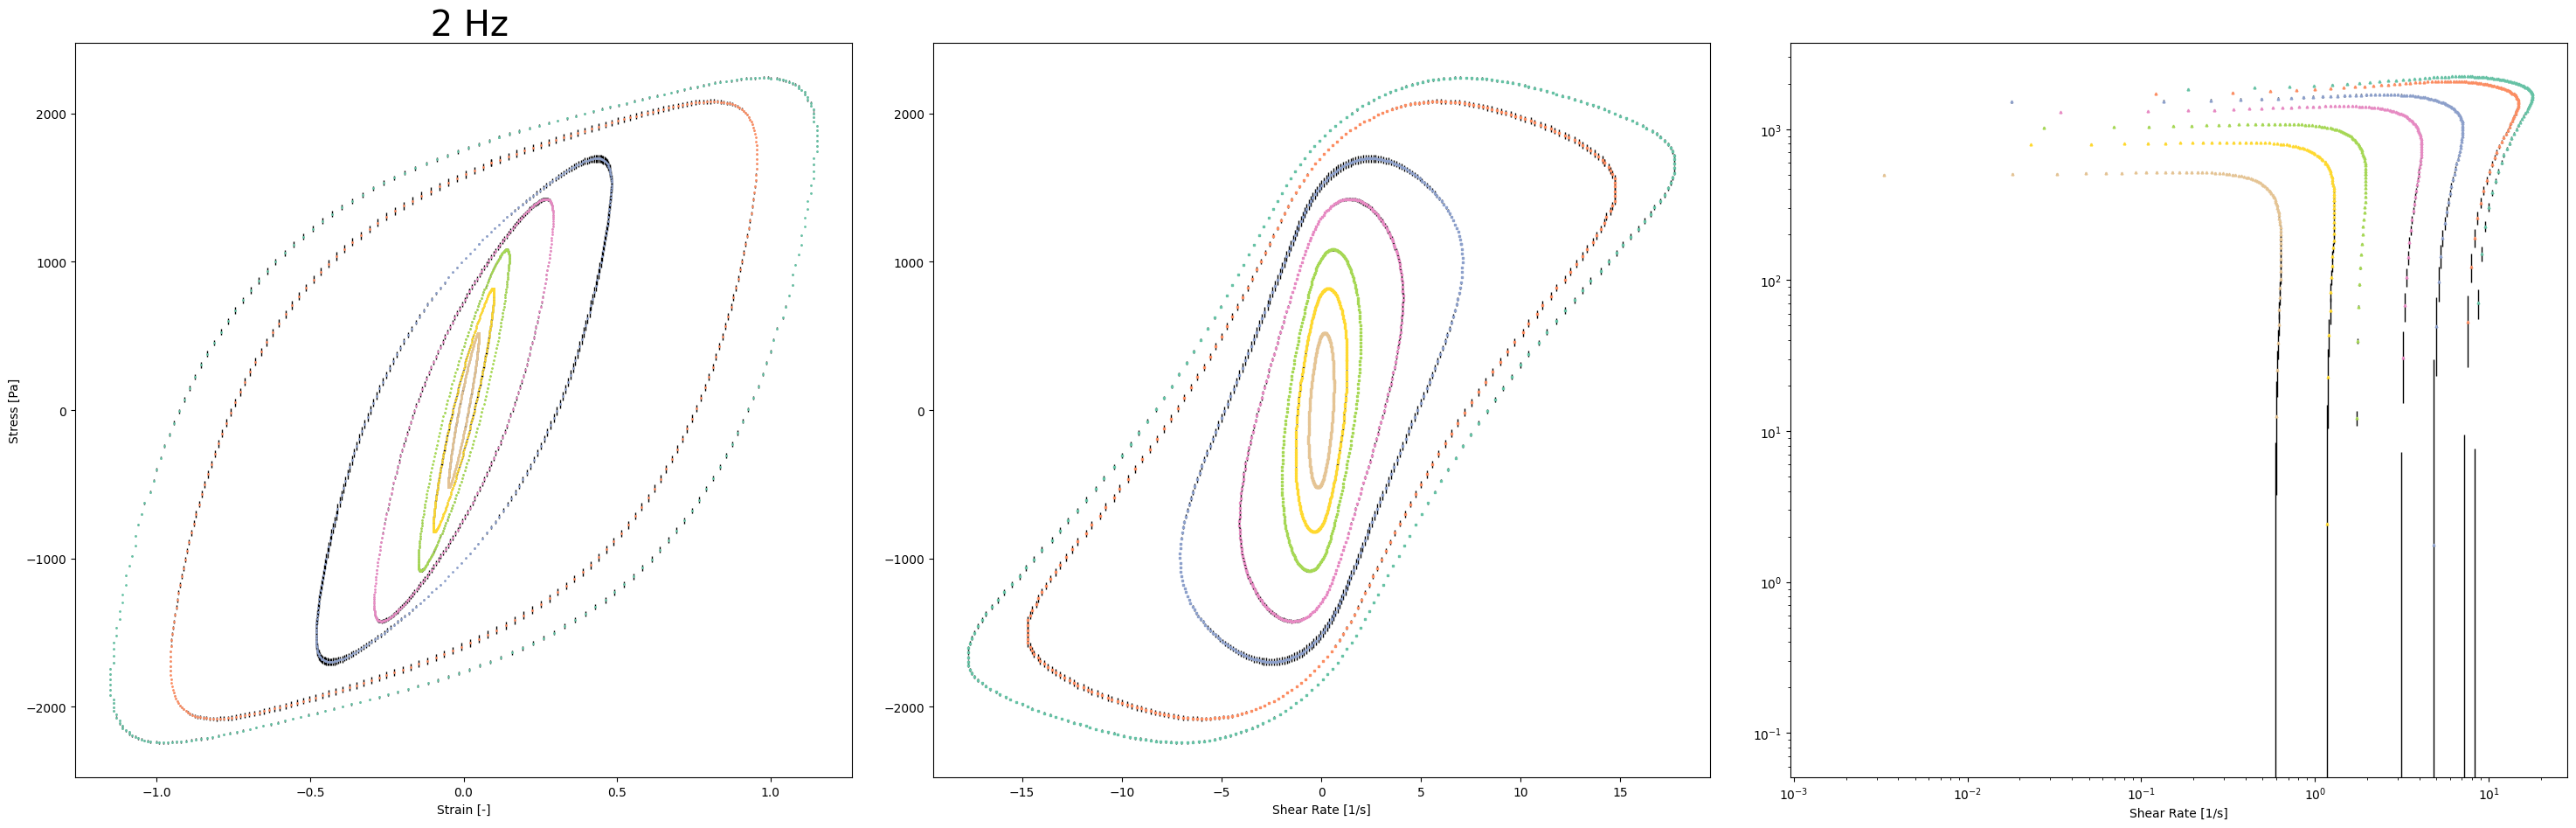

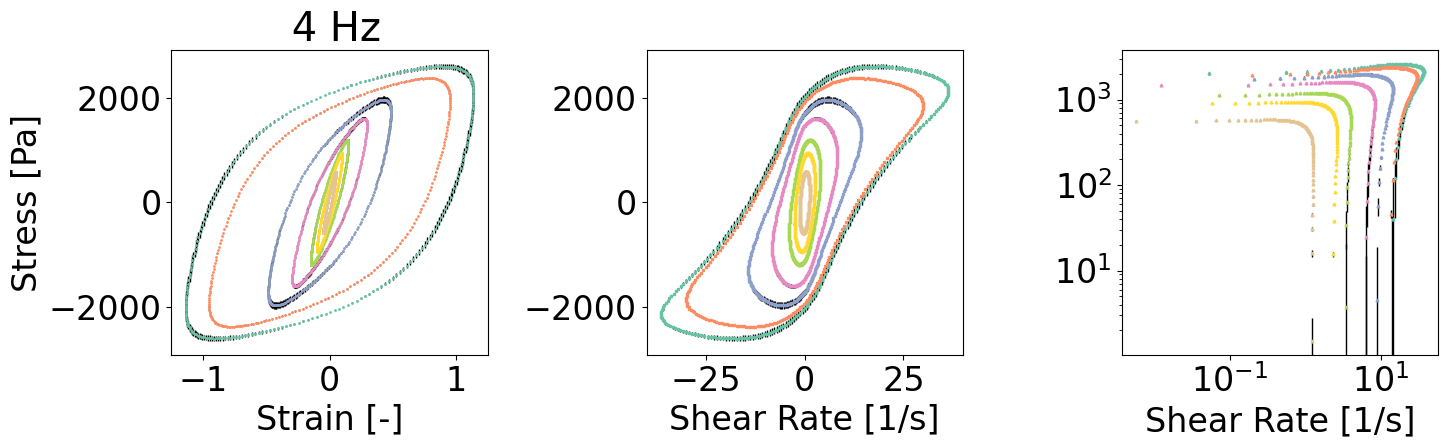

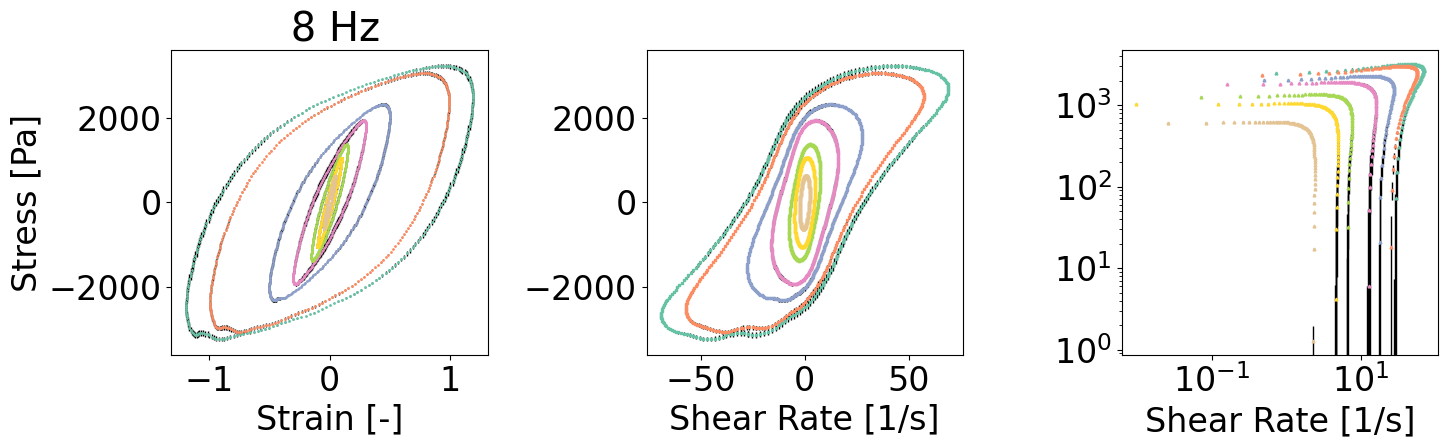

In [17]:
# Create a figure and an array of axes with 1 row and 3 columns
fig, axs = plt.subplots(1, 3, figsize=(30, 10))
axs[2].set_xscale('log')
axs[2].set_yscale('log')
color_palette = plt.cm.Set2(np.linspace(0, 1, 9))

font = {'family' : 'arial',
        'weight' : 'bold',
        'size'   : 24}

plt.rcParams.update({'font.size': 24})

axs[0].set_xlabel('Strain [-]')
axs[1].set_xlabel('Shear Rate [1/s]')
axs[2].set_xlabel('Shear Rate [1/s]')
axs[0].set_ylabel('Stress [Pa]')
axs[0].set_title(' 2 Hz')

std_all = []
for stdval in std_freq2: std_all.append(stdval)
for stdval in std_freq4: std_all.append(stdval)
for stdval in std_freq8: std_all.append(stdval)

for i in range(0,7):

    err = std_all[i][-257:]
    lim1 = 0
    lim2 = 257

    x1 = data_exp_avg[i][2][-257:]
    y1 = data_exp_avg[i][1][-257:]

    x2 = data_exp_avg[i][3][-257:]
    y2 = data_exp_avg[i][1][-257:]

    x3 = data_exp_avg[i][3][-257:][lim1:lim2]
    y3 = data_exp_avg[i][1][-257:][lim1:lim2]



    # Plot data in the first subplot
    axs[0].errorbar(x1, y1, yerr=err, marker='o', color=color_palette[i], label='Data 1', markersize=1, linewidth =0, ecolor = 'black', elinewidth=1)

    # Plot data in the second subplot
    axs[1].errorbar(x2, y2, yerr=err, marker='s', color=color_palette[i], label='Data 2', markersize=2, linewidth =0 , ecolor = 'black', elinewidth=1)

    # Plot data in the third subplot
    axs[2].errorbar(x3, y3, yerr=err[lim1:lim2], marker='^', color=color_palette[i], label='Data 3', markersize=2, linewidth =0, ecolor = 'black', elinewidth=1)

# Adjust layout for better spacing
plt.tight_layout()

# Display the plots
plt.show()

# Create a figure and an array of axes with 1 row and 3 columns
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[2].set_xscale('log')
axs[2].set_yscale('log')

axs[0].set_xlabel('Strain [-]')
axs[1].set_xlabel('Shear Rate [1/s]')
axs[2].set_xlabel('Shear Rate [1/s]')
axs[0].set_ylabel('Stress [Pa]')
axs[0].set_title(' 4 Hz')


for i in range(7,14):

    err = std_all[i][-257:]
    lim1 = 0
    lim2 = 257

    x1 = data_exp_avg[i][2][-257:]
    y1 = data_exp_avg[i][1][-257:]

    x2 = data_exp_avg[i][3][-257:]
    y2 = data_exp_avg[i][1][-257:]

    x3 = data_exp_avg[i][3][-257:][lim1:lim2]
    y3 = data_exp_avg[i][1][-257:][lim1:lim2]



    # Plot data in the first subplot
    axs[0].errorbar(x1, y1, yerr=err, marker='o', color=color_palette[i-7], label='Data 1', markersize=1, linewidth =0, ecolor = 'black', elinewidth=1)

    # Plot data in the second subplot
    axs[1].errorbar(x2, y2, yerr=err, marker='s', color=color_palette[i-7], label='Data 2', markersize=2, linewidth =0 , ecolor = 'black', elinewidth=1)

    # Plot data in the third subplot
    axs[2].errorbar(x3, y3, yerr=err[lim1:lim2], marker='^', color=color_palette[i-7], label='Data 3', markersize=2, linewidth =0, ecolor = 'black', elinewidth=1)

# Adjust layout for better spacing
plt.tight_layout()

# Display the plots
plt.show()


# Create a figure and an array of axes with 1 row and 3 columns
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[2].set_xscale('log')
axs[2].set_yscale('log')

axs[0].set_xlabel('Strain [-]')
axs[1].set_xlabel('Shear Rate [1/s]')
axs[2].set_xlabel('Shear Rate [1/s]')
axs[0].set_ylabel('Stress [Pa]')
axs[0].set_title(' 8 Hz')


for i in range(14,21):

    err = std_all[i][-257:]
    lim1 = 0
    lim2 = 257

    x1 = data_exp_avg[i][2][-257:]
    y1 = data_exp_avg[i][1][-257:]

    x2 = data_exp_avg[i][3][-257:]
    y2 = data_exp_avg[i][1][-257:]

    x3 = data_exp_avg[i][3][-257:][lim1:lim2]
    y3 = data_exp_avg[i][1][-257:][lim1:lim2]



    # Plot data in the first subplot
    axs[0].errorbar(x1, y1, yerr=err, marker='o', color=color_palette[i-14], label='Data 1', markersize=1, linewidth =0, ecolor = 'black', elinewidth=1)

    # Plot data in the second subplot
    axs[1].errorbar(x2, y2, yerr=err, marker='s', color=color_palette[i-14], label='Data 2', markersize=2, linewidth =0 , ecolor = 'black', elinewidth=1)

    # Plot data in the third subplot
    axs[2].errorbar(x3, y3, yerr=err[lim1:lim2], marker='^', color=color_palette[i-14], label='Data 3', markersize=2, linewidth =0, ecolor = 'black', elinewidth=1)

# Adjust layout for better spacing
plt.tight_layout()

# Display the plots
plt.show()

## Stress Growth

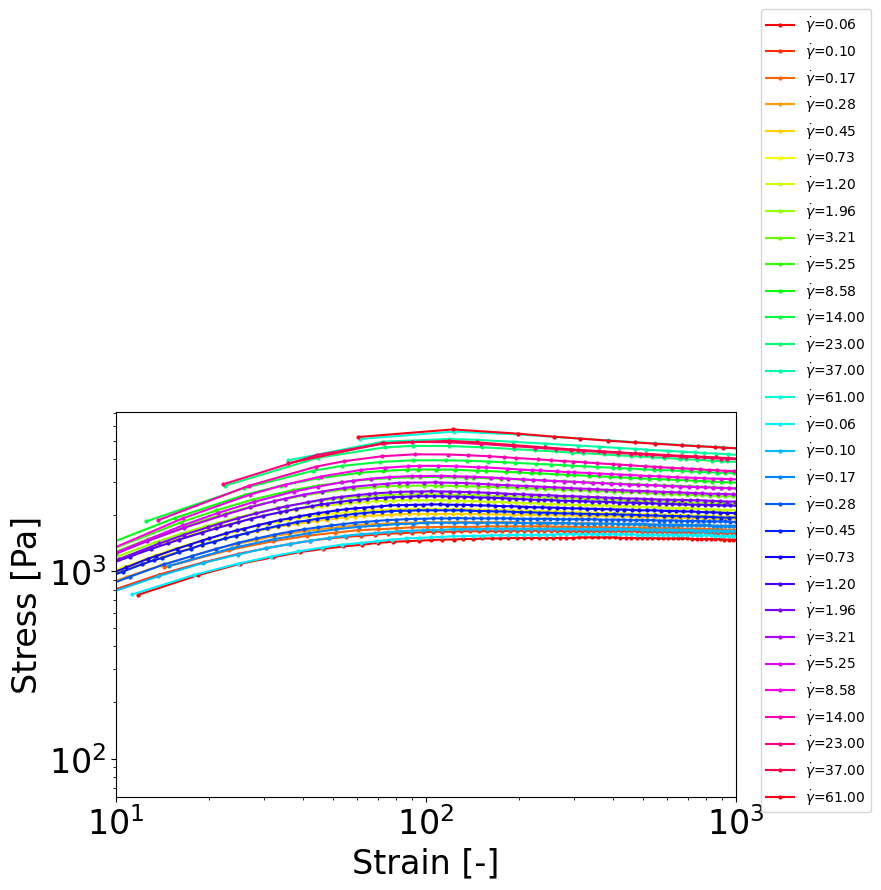

In [18]:
#   Inputs
n_header= 105 #header rows just from the begining to the first data
n_rows=99 #number of data points in the measurement
rows_btw_data = 68 #number20 of rows between two measurements
header_list=[ 'Meas. Pts.','Time', 'Strain', 'Shear Rate', 'Shear Stress',\
            'Torque', 'Normal Force', 'Viscosity', 'Status']
what_to_collect_time_dep= ['Time', 'Strain', 'Shear Stress'  ]
what_to_collect_single_val = []
path_read="/Users/yagmurbalabanli/Library/Mobile Documents/com~apple~CloudDocs/Yagmur/studies/study-2-extrusion-model/computational/model_implication/experimental_data/2024-08-06/20240905_P60.xlsx"
sheet_name = ['STEADY']

sample_list = ['01-growth-P60-0.60-0.063',\
               '02-growth-P60-0.60-0.100',\
               '03-growth-P60-0.60-0.170',\
               '04-growth-P60-0.60-0.280',\
               '05-growth-P60-0.60-0.450',\
               '06-growth-P60-0.60-0.730',\
               '07-growth-P60-0.60-1.20',\
               '08-growth-P60-0.60-1.96',\
               '09-growth-P60-0.60-3.21',\
               '10-growth-P60-0.60-5.25',\
               '11-growth-P60-0.60-8.58',\
               '12-growth-P60-0.60-14.1',\
               '13-growth-P60-0.60-23.0',\
               '14-growth-P60-0.60-37.0',\
               '15-growth-P60-0.60-61.0',\
               '16-growth-P60-0.60-0.063',\
               '17-growth-P60-0.60-0.100',\
               '18-growth-P60-0.60-0.170',\
               '19-growth-P60-0.60-0.280',\
               '20-growth-P60-0.60-0.450',\
               '21-growth-P60-0.60-0.730',\
               '22-growth-P60-0.60-1.20',\
               '23-growth-P60-0.60-1.96',\
               '24-growth-P60-0.60-3.21',\
               '25-growth-P60-0.60-5.25',\
               '26-growth-P60-0.60-8.58',\
               '27-growth-P60-0.60-14.1',\
               '28-growth-P60-0.60-23.0',\
               '29-growth-P60-0.60-37.0',\
               '30-growth-P60-0.60-61.0',\
               ]  
 

#   Function
data_exp_stgrw= read_data1(n_header, n_rows, header_list, what_to_collect_time_dep,what_to_collect_single_val,\
               path_read, sheet_name, sample_list, rows_btw_data)

color_palette = plt.cm.hsv(np.linspace(0, 1, 30))
fig, axs = plt.subplots(figsize=(8, 5))
axs.set_xscale('log')
axs.set_yscale('log')
shear_rates = [0.063, 0.1, 0.17, 0.28, 0.45, 0.73, 1.2,\
                1.96, 3.21, 5.25, 8.58, 14,23,37,61,\
                0.063, 0.1, 0.17, 0.28, 0.45, 0.73, 1.2,\
                1.96, 3.21, 5.25, 8.58, 14,23,37,61]
#axs.set_xlim(0.1,100)
#axs.set_ylim(1000,10000)
i=0
for elem in data_exp_stgrw:
    #print(elem[0][0])
    axs.plot(elem[1],elem[2], label='$\dot{{\gamma}}$={:1.2f}'.format(shear_rates[i]), color=color_palette[i], marker='o', markersize=2)
    i+=1

axs.set_xlabel('Strain [-]')
axs.set_ylabel('Stress [Pa]')
axs.set_xlim(1e1,1e3)
# axs.set_ylim(1e2,1e4)

# x = [60,40,15, 10, 5, 3  ] #shear rate
# y =[500,400,300,200,150, 100  ] #strain
# y2 = [3e3, 2.5e3, 2e3, 1.5e3, 1.2e3, 1e3  ]

# axs.plot(y,y2,color='black')

axs.legend(loc=(1.04, -0.04), fontsize=10)




Get the average of replicates

99


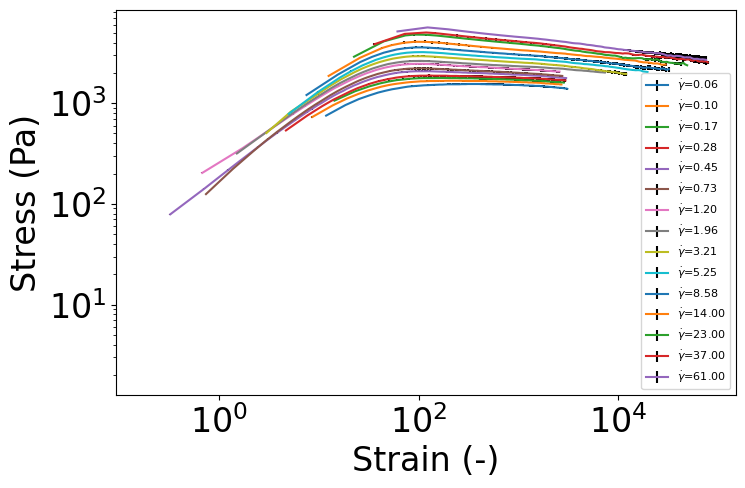

In [19]:
first_rep = []
second_rep = []
i=0
for elem in data_exp_stgrw:
    # elem[1]: strain
    # elem[2]: stress

    if i < 15: # there are 15 shear rates
        first_rep.append(elem[2])
    if i >= 15:
        second_rep.append(elem[2])
    i+=1

avg = []
std_strgrw = []
for n in range(0,len(first_rep)):
    avg_elem = []
    std_elem = []
    for m in range(0,len(first_rep[n])):
        array = [first_rep[n][m], second_rep[n][m]]
        avg_val = np.average(array)
        std_val = np.std(array)
        avg_elem.append(avg_val)
        std_elem.append(std_val)
    
    avg.append(avg_elem)
    std_strgrw.append(std_elem)

data_exp_stgrw_avg = []

for i in range(0,15):
    elem = []
    for k in range(0,3):
        if k == 0: elem.append(data_exp_stgrw[i][0])
        if k == 1: elem.append(data_exp_stgrw[i][1])
        if k == 2: elem.append(avg[i])
    data_exp_stgrw_avg.append(elem)

print(len(data_exp_stgrw_avg[0][1]))




fig, axs = plt.subplots(figsize=(8, 5))
axs.set_xscale('log')
axs.set_yscale('log')
axs.set_xlabel('Strain (-)')
axs.set_ylabel('Stress (Pa)')

i=0
for elem in range(0,len(data_exp_stgrw_avg)):
    axs.errorbar(data_exp_stgrw_avg[i][1],data_exp_stgrw_avg[i][2], yerr=std_strgrw[i], label='$\dot{{\gamma}}$={:1.2f}'.format(shear_rates[i]), marker='o', markersize = 0, ecolor='black')

    i+=1
axs.legend(fontsize=8)



# Flow Curves: Compare Stress Growth and LAOS and HB Fitting

To do: \
Include errorbars in new plots

LAOS fitted HB: TAU - n - dotgammacr : [1001.3794899497004, 0.3024060656589302, 2.600346731143198]
Steady fitted HB: TAU - n - dotgammacr : [847.4029589060317, 0.28664606824972405, 0.13569066249805056]
26.59497056530027
10.149358422627484


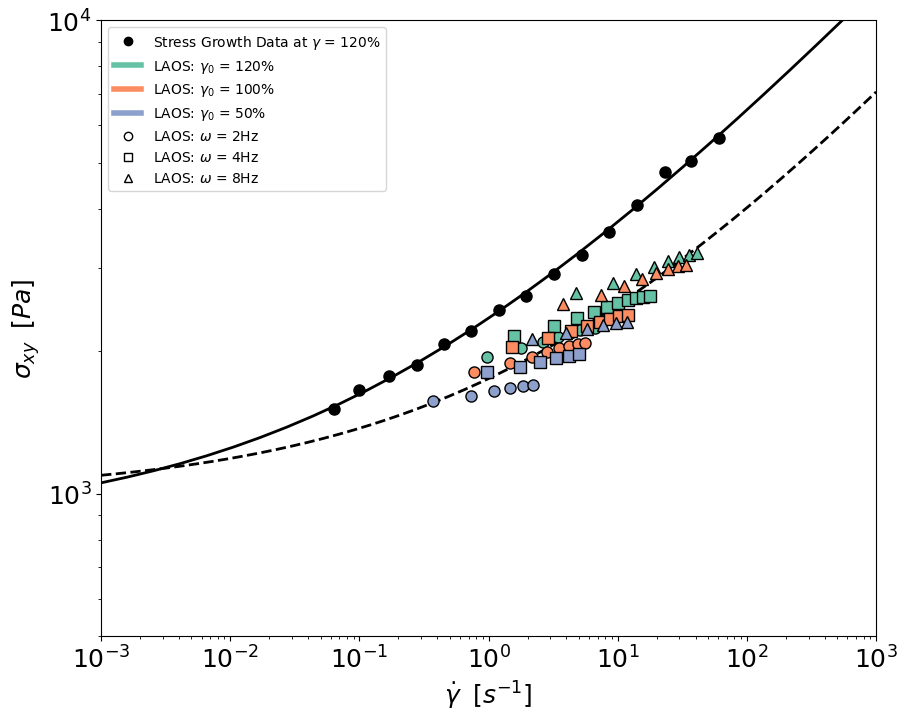

In [53]:
# Figure settings
color_palette_grays = plt.cm.Grays(np.linspace(0.1,1, 4))
color_palette = plt.cm.Set2(np.linspace(0, 1, 7))
markersize=10

fig, axs = plt.subplots(figsize=(10, 8))
axs.set_xscale('log')
axs.set_yscale('log')

axs.set_xlim(0.001,1000)
axs.set_ylim(500,10000)

axs.set_xlabel("$\dot{{\gamma}}\;\;[s^{-1}]$")
axs.set_ylabel("$\sigma_{xy}\;\;[Pa]$")


#Steady shearing data
stresses = []
target_strains = [120]
for target_strain in target_strains:
    stress = shear_rate_sweep(target_strain, data_exp_stgrw_avg, i_strain=1, i_stress=2)
    stresses.append(stress)

shear_rates = [0.063, 0.1, 0.17, 0.28, 0.45, 0.73, 1.2,\
                1.96, 3.21, 5.25, 8.58, 14,23,37,61]

i=0
for stress in stresses:
    axs.errorbar(shear_rates[0:], stress[0:], marker='o', linewidth=0, markersize = 8, color='black', markeredgecolor='black' )
    popt_steady, pconv_steady = curve_fit(HB, shear_rates[0:], stress[0:], p0=[1000, 10, 0.2] )
    dot_gammacr_steady = (popt_steady[0] / (popt_steady[1]))**(1/popt_steady[2])
    perr_steady = np.sqrt(np.diag(pconv_steady))
    model_data_HB_steady = HB(np.logspace(-3,5,40), popt_steady[0],popt_steady[1],popt_steady[2])
    plt.plot(np.logspace(-3,5,40),model_data_HB_steady,  linewidth=2, color='black')
    i+=1

HBparam_steady = [popt_steady[0],  popt_steady[2], dot_gammacr_steady]


#Data Analysis for Extractting Flow from LAOS

x_shr,y_str = extract_steady_from_laos(data_exp_avg)

hbfit_x = []
hbfit_y = []
skip_first = 3
for i in [0,1,2,7,8,9,14,15,16]: #highest amplitudes from each 3 frequency
    x = x_shr[i][skip_first:] ; y=y_str[i][skip_first:]
    
    if i in [0,1,2]:
        xplt = [] ; yplt = []
        for k in range(0,len(x)): 
            if k%3 == 0: 
                xplt.append(x[k])
                yplt.append(y[k])
        axs.errorbar(xplt, yplt, marker='o', linewidth=0, markersize = 8, color=color_palette[i%7], markeredgecolor='black' )
    
    if i in [7,8,9]:
        xplt = [] ; yplt = []
        for k in range(0,len(x)): 
            if k%3 == 0: 
                xplt.append(x[k])
                yplt.append(y[k])
        axs.errorbar(xplt, yplt, marker='s', linewidth=0, markersize = 8, color=color_palette[i%7], markeredgecolor='black' )
    
    if i in [14,15,16]:
        xplt = [] ; yplt = []
        for k in range(0,len(x)): 
            if k%3 == 0: 
                xplt.append(x[k])
                yplt.append(y[k])
        axs.errorbar(xplt, yplt, marker='^', linewidth=0, markersize = 8, color=color_palette[i%7], markeredgecolor='black' )
    
    for elem in x_shr[i][skip_first:]: hbfit_x.append(elem)
    for elem in y_str[i][skip_first:]: hbfit_y.append(elem)

popt_laos, pconv_laos= curve_fit(HB, hbfit_x, hbfit_y, p0=[1000, 5, 0.2])
dot_gammacr_laos = (popt_laos[0] / (popt_laos[1]))**(1/popt_laos[2])
perr_laos = np.sqrt(np.diag(pconv_laos))


model_data = HB(np.logspace(-3,3,50), popt_laos[0],popt_laos[1],popt_laos[2])
plt.plot(np.logspace(-3,3,50), model_data,  linewidth=2, color='black', linestyle='--')

HBparam_laos = [popt_laos[0], popt_laos[2],  dot_gammacr_laos]


custom_lines = [Line2D([0], [0], color='black', lw=0, marker='o',markeredgecolor='black'),
                Line2D([0], [0], color=color_palette[0], lw=4),
                Line2D([0], [0], color=color_palette[1], lw=4),
                Line2D([0], [0], color=color_palette[2], lw=4),
                Line2D([0], [0], color='white', lw=0, marker='o', markeredgecolor='black'),
                Line2D([0], [0], color='white', lw=0, marker='s',markeredgecolor='black'),
                Line2D([0], [0], color='white', lw=0, marker='^',markeredgecolor='black')] 
       
axs.legend(custom_lines, ['Stress Growth Data at $\gamma$ = 120%',\
                           'LAOS: $\gamma_0$ = 120%',\
                           'LAOS: $\gamma_0$ = 100%',\
                           'LAOS: $\gamma_0$ = 50%',\
                           'LAOS: $\omega$ = 2Hz',\
                           'LAOS: $\omega$ = 4Hz',\
                           'LAOS: $\omega$ = 8Hz']
                           , fontsize=10, loc= 'upper left')

print(f'LAOS fitted HB: TAU - n - dotgammacr : {HBparam_laos}')
print(f'Steady fitted HB: TAU - n - dotgammacr : {HBparam_steady}')


#calcualte errors 



HBlaos_dotgam_pluserr = (popt_laos[0] / (popt_laos[1]+perr_laos[1]))**(1/popt_laos[2])
HBlaos_dotgam_minuserr = (popt_laos[0] / (popt_laos[1]-perr_laos[1]))**(1/popt_laos[2])
print(perr_laos[1]/popt_laos[1]*100)

HBst_dotgam_pluserr = (popt_steady[0] / (popt_steady[1]+perr_steady[1]))**(1/popt_steady[2])
HBst_dotgam_minuserr = (popt_steady[0] / (popt_steady[1]-perr_steady[1]))**(1/popt_steady[2])
print(perr_steady[1]/popt_steady[1]*100)

error_HBlaos = [perr_laos[0], perr_laos[2], HBlaos_dotgam_pluserr, HBlaos_dotgam_minuserr]
error_HBsteady = [perr_steady[0], perr_steady[2], HBst_dotgam_pluserr, HBst_dotgam_minuserr]

# print(HBlaos_dotgam_pluserr)
# print(dot_gammacr_laos)
# print(HBlaos_dotgam_minuserr)

# print(HBst_dotgam_pluserr)
# print(dot_gammacr_steady)
# print(HBst_dotgam_minuserr)





# SAOS Fitting

## From the frequency sweep

### From Viscoelastic Moduli

In [21]:
modulus = [0.9] 
t_rel=[0.5] 

strain_lin = [0.001]
freqvals_frfit= [ 0.1, 0.1585, 0.2512, 0.3981, 0.631, 1, 1.585, 2.512, 3.981, 6.31, 10] #in Hz
cycles = 20
eta_inf = 1e-9
ntimesteps_cycle = 256

#Bounds
bounds_mod0 = [2,6]
bounds_trel0 = [-2,2]
bounds_mod0_n = (0,1)
bounds_trel0_n = (0,1)
bounds_lin_norm = [bounds_mod0, bounds_trel0]
bounds_lin = [bounds_mod0_n, bounds_trel0_n] 


# Linear Region Fitting
params_frfit = []
for freq in freqvals_frfit:
        init_guess = [modulus[0], t_rel[0]]
        opt_par_vis, objfuncval_vis, result= optimization_lin_modulus(init_guess, bounds_lin_norm, bounds_lin, strain_lin, 
                freq=freq,freqvals=freqvals_frfit, cycles=20,ntimesteps_cycle=256, data_exp_frswp=data_exp_frswp_avg)

        params_frfit.append(opt_par_vis)

rm: strain_sweep_lin.txt: No such file or directory
rm: strain_sweep_lin.txt: No such file or directory
rm: strain_sweep_lin.txt: No such file or directory
rm: strain_sweep_lin.txt: No such file or directory
rm: strain_sweep_lin.txt: No such file or directory
rm: strain_sweep_lin.txt: No such file or directory
rm: strain_sweep_lin.txt: No such file or directory
rm: strain_sweep_lin.txt: No such file or directory
rm: strain_sweep_lin.txt: No such file or directory
rm: strain_sweep_lin.txt: No such file or directory
rm: strain_sweep_lin.txt: No such file or directory


0.1
[10747.739855077278, 7.204677338787629]
0.1585
[11582.930340001447, 4.9392854356987215]
0.2512
[12363.950496189747, 3.289851944562204]
0.3981
[13129.710697480943, 2.138927071913743]
0.631
[13924.660926938672, 1.3733318451391996]
1
[14728.746380060797, 0.8772192905533478]
1.585
[15565.95161484681, 0.5561125156589177]
2.512
[16423.02491560437, 0.35097625628130685]
3.981
[17288.812603933344, 0.2206868160572442]
6.31
[18181.357376311196, 0.1383738725800585]
10
[19166.639600160666, 0.08693332512200687]


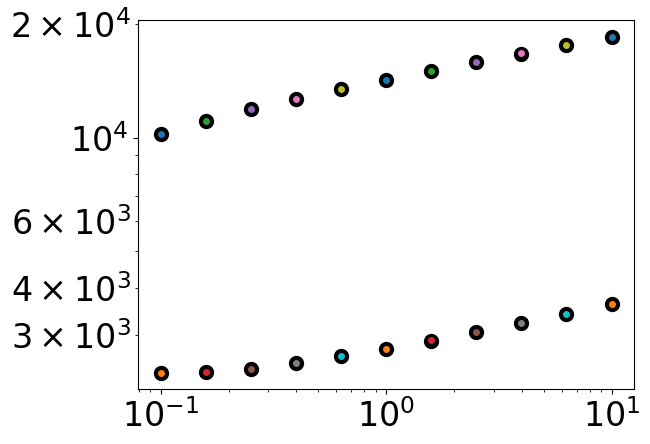

In [22]:
plt.loglog(data_exp_frswp_avg[0][0], data_exp_frswp_avg[0][1], marker='o', linewidth=0, color='black', markersize=10)
plt.loglog(data_exp_frswp_avg[0][0], data_exp_frswp_avg[0][2], marker='o', linewidth=0, color='black', markersize=10)
strain_lin = [0.001]
i=0
for freq in freqvals_frfit:
    print(freq)
    print(params_frfit[i])

    G1mod, G2mod = fitting_func_SAOS_freq_and_strain(params_frfit[i], strain_lin[0],\
                        freq,cycles,ntimesteps_cycle)

    plt.loglog(freq, G1mod, linewidth=3, marker='o', markersize=4)
    plt.loglog(freq, G2mod, linewidth=3, marker='o', markersize=4)
    i+=1
   

Error estimation is not really possible since we are trying to predict 2 parameters using 2 pieces of data. the right hand side expressed below would be infinite. 

variation = np.linspace(0.5,50,1000) \        
p= 2\
n= 2 \
F= 1.17 \
right_hand_side = (p / (n-p)) * F


### From the Waveform Data

In [23]:
modulus = [0.5] 
t_rel=[0.5] 

strain_lin = 0.001
freqvals_frfit= [ 0.1, 0.1585, 0.2512, 0.3981, 0.631, 1, 1.585, 2.512, 3.981, 6.31, 10]
cycles = 20
eta_inf = 1e-9
ntimesteps_cycle = 256

#Bounds
bounds_mod0 = [2,6]
bounds_trel0 = [-2,2]
bounds_mod0_n = (0,1)
bounds_trel0_n = (0,1)
bounds_lin_norm = [bounds_mod0, bounds_trel0]
bounds_lin = [bounds_mod0_n, bounds_trel0_n] 


# Linear Region Fitting
params_frfit_waveform = []
obj_frfit_waveform = []
for freq in freqvals_frfit:
        init_guess = [modulus[0], t_rel[0]]
        opt_par_wave, objfuncval_wave, result_wave= optimization_lin_perfreq(init_guess, bounds_lin_norm, strain_lin, 
                freq_vals=[freq], wholefreq=freqvals_frfit, cycles=20,ntimesteps_cycle=256, col_index_stress=1,\
                          all_data=data_exp_frswp_waveform_avg)

        params_frfit_waveform.append(opt_par_wave)
        obj_frfit_waveform.append(objfuncval_wave)

rm: strain_sweep_lin.txt: No such file or directory


       message: Optimization terminated successfully.
       success: True
        status: 0
           fun: 0.01434473542727222
             x: [ 5.085e-01  6.983e-01]
           nit: 33
          nfev: 63
 final_simplex: (array([[ 5.085e-01,  6.983e-01],
                       [ 5.085e-01,  6.982e-01],
                       [ 5.085e-01,  6.983e-01]]), array([ 1.434e-02,  1.435e-02,  1.435e-02]))


rm: strain_sweep_lin.txt: No such file or directory


       message: Optimization terminated successfully.
       success: True
        status: 0
           fun: 0.002056817864055185
             x: [ 5.165e-01  6.581e-01]
           nit: 28
          nfev: 54
 final_simplex: (array([[ 5.165e-01,  6.581e-01],
                       [ 5.165e-01,  6.581e-01],
                       [ 5.165e-01,  6.580e-01]]), array([ 2.057e-03,  2.058e-03,  2.061e-03]))


rm: strain_sweep_lin.txt: No such file or directory


       message: Optimization terminated successfully.
       success: True
        status: 0
           fun: 0.04373596590113616
             x: [ 5.236e-01  6.120e-01]
           nit: 28
          nfev: 55
 final_simplex: (array([[ 5.236e-01,  6.120e-01],
                       [ 5.236e-01,  6.120e-01],
                       [ 5.236e-01,  6.121e-01]]), array([ 4.374e-02,  4.374e-02,  4.374e-02]))


rm: strain_sweep_lin.txt: No such file or directory


       message: Optimization terminated successfully.
       success: True
        status: 0
           fun: 0.000674508546717096
             x: [ 5.303e-01  5.660e-01]
           nit: 25
          nfev: 49
 final_simplex: (array([[ 5.303e-01,  5.660e-01],
                       [ 5.303e-01,  5.661e-01],
                       [ 5.303e-01,  5.661e-01]]), array([ 6.745e-04,  6.775e-04,  6.820e-04]))


rm: strain_sweep_lin.txt: No such file or directory


       message: Optimization terminated successfully.
       success: True
        status: 0
           fun: 0.9334500779961639
             x: [ 5.364e-01  5.047e-01]
           nit: 23
          nfev: 46
 final_simplex: (array([[ 5.364e-01,  5.047e-01],
                       [ 5.365e-01,  5.047e-01],
                       [ 5.365e-01,  5.047e-01]]), array([ 9.335e-01,  9.335e-01,  9.335e-01]))


rm: strain_sweep_lin.txt: No such file or directory


       message: Optimization terminated successfully.
       success: True
        status: 0
           fun: 0.24942268038304552
             x: [ 5.425e-01  4.663e-01]
           nit: 22
          nfev: 44
 final_simplex: (array([[ 5.425e-01,  4.663e-01],
                       [ 5.426e-01,  4.663e-01],
                       [ 5.426e-01,  4.662e-01]]), array([ 2.494e-01,  2.494e-01,  2.494e-01]))


rm: strain_sweep_lin.txt: No such file or directory


       message: Optimization terminated successfully.
       success: True
        status: 0
           fun: 1.131194989120213
             x: [ 5.488e-01  4.023e-01]
           nit: 27
          nfev: 51
 final_simplex: (array([[ 5.488e-01,  4.023e-01],
                       [ 5.488e-01,  4.024e-01],
                       [ 5.488e-01,  4.024e-01]]), array([ 1.131e+00,  1.131e+00,  1.131e+00]))


rm: strain_sweep_lin.txt: No such file or directory


       message: Optimization terminated successfully.
       success: True
        status: 0
           fun: 0.11436112170681546
             x: [ 5.551e-01  3.658e-01]
           nit: 27
          nfev: 55
 final_simplex: (array([[ 5.551e-01,  3.658e-01],
                       [ 5.551e-01,  3.657e-01],
                       [ 5.551e-01,  3.657e-01]]), array([ 1.144e-01,  1.144e-01,  1.144e-01]))


rm: strain_sweep_lin.txt: No such file or directory


       message: Optimization terminated successfully.
       success: True
        status: 0
           fun: 0.002509520281484513
             x: [ 5.613e-01  3.184e-01]
           nit: 30
          nfev: 60
 final_simplex: (array([[ 5.613e-01,  3.184e-01],
                       [ 5.613e-01,  3.185e-01],
                       [ 5.613e-01,  3.185e-01]]), array([ 2.510e-03,  2.512e-03,  2.513e-03]))


rm: strain_sweep_lin.txt: No such file or directory


       message: Optimization terminated successfully.
       success: True
        status: 0
           fun: 1.8290257418779998
             x: [ 5.676e-01  2.374e-01]
           nit: 38
          nfev: 78
 final_simplex: (array([[ 5.676e-01,  2.374e-01],
                       [ 5.676e-01,  2.374e-01],
                       [ 5.676e-01,  2.374e-01]]), array([ 1.829e+00,  1.829e+00,  1.829e+00]))


rm: strain_sweep_lin.txt: No such file or directory


       message: Optimization terminated successfully.
       success: True
        status: 0
           fun: 0.21809248721057103
             x: [ 5.730e-01  2.266e-01]
           nit: 35
          nfev: 71
 final_simplex: (array([[ 5.730e-01,  2.266e-01],
                       [ 5.730e-01,  2.266e-01],
                       [ 5.730e-01,  2.266e-01]]), array([ 2.181e-01,  2.181e-01,  2.181e-01]))


Plot and check if predictied and exp match

[15675.297300260874, 0.4067379471517119]
[16606.294968865997, 0.2905303185371182]
[17589.327435945594, 0.1877992073597938]
[18636.55911938606, 0.08907399796600558]
[19590.084227658353, 0.08058545112291556]


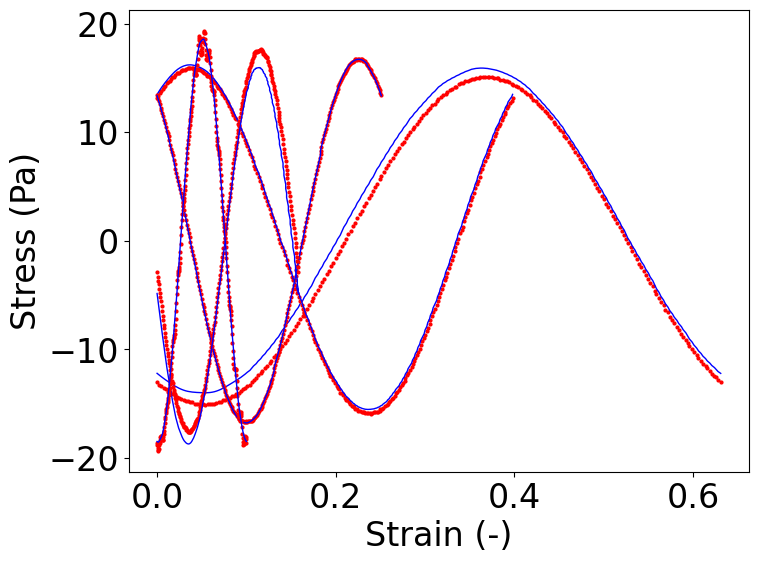

In [24]:
fig, axs = plt.subplots(figsize=(8, 6))
color_palette = plt.cm.Set2(np.linspace(0, 1, 9))

axs.set_xlabel('Strain (-)')
axs.set_ylabel("Stress (Pa)")

#Compare the experimental and predicted data
gammadot_list = data_exp_frswp_waveform[0][0][3]

for i in range(6,11):
    strain_lin = 0.001
    params = params_frfit_waveform[i]
    print(params_frfit_waveform[i])
    pred_data = fitting_func_SAOS_perfreq(params, strain_lin,\
                      [freqvals_frfit[i]],cycles,ntimesteps_cycle, gammadot_list[i*257:(i+1)*257])

    plt.plot(data_exp_frswp_waveform_avg[0][0][0][i*257:(i+1)*257],
                   data_exp_frswp_waveform_avg[0][0][1][i*257:(i+1)*257], marker='o', linewidth=0, markersize=2, color='red')
    plt.plot(data_exp_frswp_waveform_avg[0][0][0][i*257:(i+1)*257], 
                  pred_data[0][1][-257:], linewidth=1, marker='o', color='blue', markersize =0)






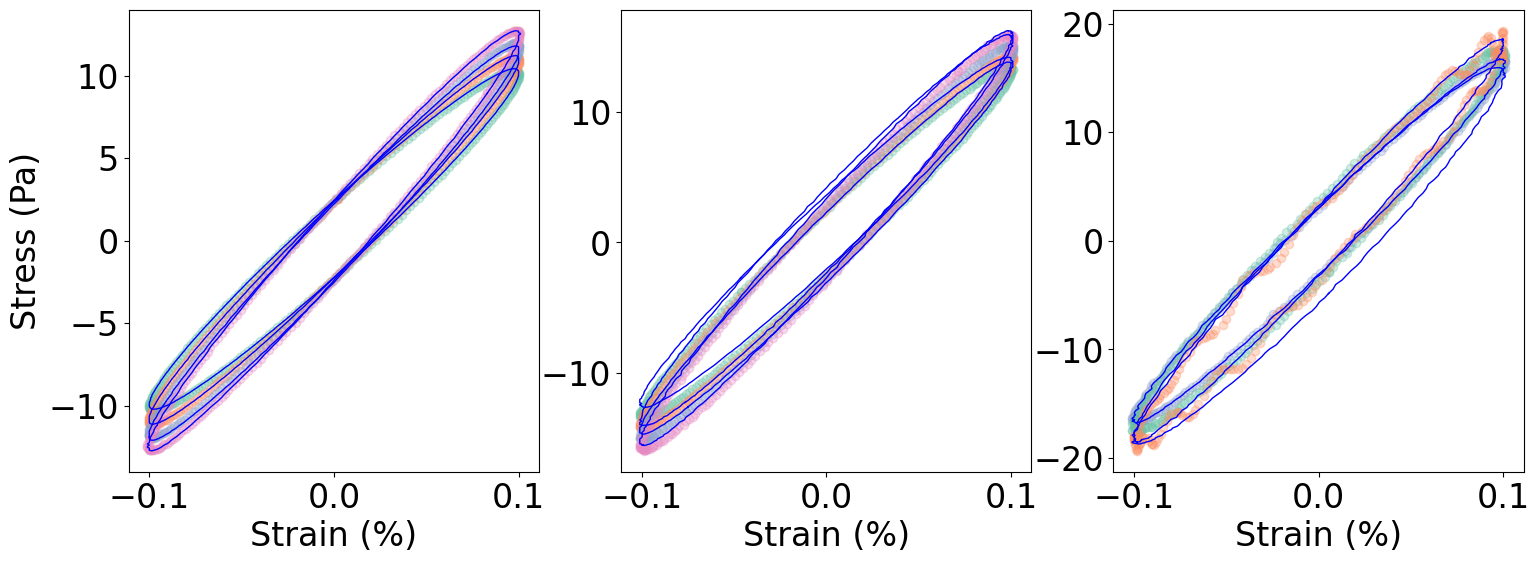

In [25]:
strain_lin = 0.001

fig, axs = plt.subplots(1,3,figsize=(18, 6))
color_palette = plt.cm.Set2(np.linspace(0, 1, 9))

axs[0].set_xlabel('Strain (%)')
axs[1].set_xlabel('Strain (%)')
axs[2].set_xlabel('Strain (%)')
axs[0].set_ylabel("Stress (Pa)")
for i in range(0,11):
    x= np.multiply(data_exp_frswp_waveform_avg[0][0][2][i*257:(i+1)*257],100)
    y= np.divide(data_exp_frswp_waveform_avg[0][0][1][i*257:(i+1)*257],1)
   
    if i <= 3:
        axs[0].errorbar(x, y,\
             marker='o', linewidth=0, markersize=6, color=color_palette[i%4], ecolor=color_palette[i], elinewidth = 1,
             label=f'freq:{freqvals_frfit[i]}', alpha=0.3)
        
    elif i < 8:
        axs[1].errorbar(x,y,\
             marker='o', linewidth=0, markersize=6, color=color_palette[i%4], ecolor=color_palette[i%3], elinewidth = 1,
             label=f'freq:{freqvals_frfit[i]}',alpha=0.3)
        
    else:
        axs[2].errorbar(x, y,\
             marker='o', linewidth=0, markersize=6, color=color_palette[i%3], ecolor=color_palette[i%3], elinewidth = 1,
             label=f'freq:{freqvals_frfit[i]}',alpha=0.3)
        
for i in range(0,11):
    x= np.multiply(data_exp_frswp_waveform_avg[0][0][2][i*257:(i+1)*257],100)
    params = params_frfit_waveform[i]
    pred_data = fitting_func_SAOS_perfreq(params, strain_lin,\
                      [freqvals_frfit[i]],cycles,ntimesteps_cycle, gammadot_list[i*257:(i+1)*257])
    if i <= 3:
        axs[0].errorbar(x, 
                  np.divide(pred_data[0][1][-257:], 1), linewidth=1, marker='o', color='blue', markersize =0)
    elif i < 8:
        axs[1].errorbar(x, 
                  np.divide(pred_data[0][1][-257:], 1), linewidth=1, marker='o', color='blue', markersize =0)
    else:
        axs[2].errorbar(x, 
                  np.divide(pred_data[0][1][-257:], 1), linewidth=1, marker='o', color='blue', markersize =0)

Find the expressions for the freq dependnt modulus and relaxation time

[0.6895232775873918, -0.9863238734768774]
[1.47502537e+04 1.26284830e-01]
[[ 4.61640883e-04 -5.91220305e-09]
 [-5.91220305e-09  1.84655897e-04]]


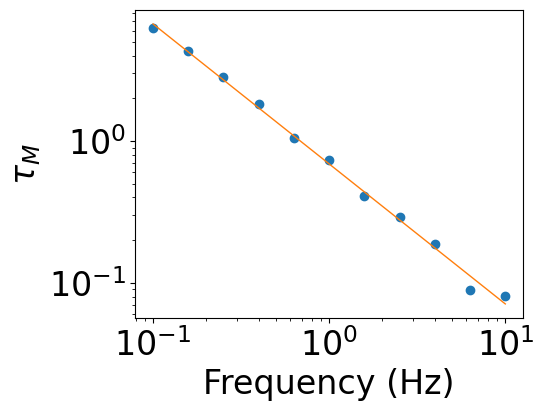

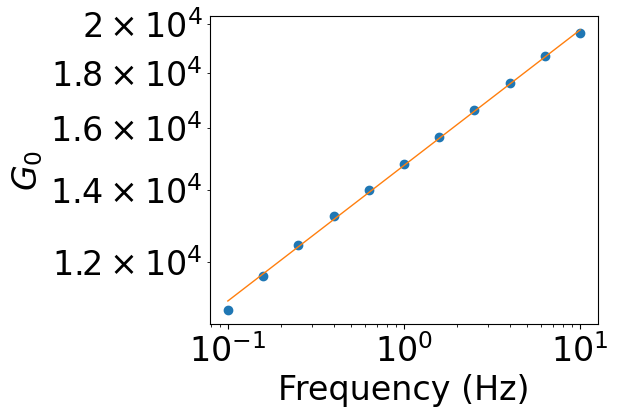

In [26]:
#Find the expressions 
freqvals_frfit= [ 0.1, 0.1585, 0.2512, 0.3981, 0.631, 1, 1.585, 2.512, 3.981, 6.31, 10]
mod_frfit = []
trel_frfit = []   
for paramset in params_frfit_waveform:
    mod_frfit.append(paramset[0])
    trel_frfit.append(paramset[1])

def power_law(x,k,n): 
    return np.multiply(k,np.power(x,n))
def linear(x,a,b):
    return a*x+b

tr_opt_lin, tr_conv_lin = curve_fit(linear, np.log10(freqvals_frfit), np.log10(trel_frfit))
#tr_opt, tr_conv = curve_fit(power_law, freqvals_frfit, trel_frfit)
mod_opt, mod_conv = curve_fit(power_law, freqvals_frfit, mod_frfit)
tr_opt = [10**tr_opt_lin[1], tr_opt_lin[0]]


print(tr_opt)
print(mod_opt)
# print(tr_conv_lin)
# print(mod_conv)
print(tr_conv_lin)

color_palette_grays = plt.cm.Grays(np.linspace(0.1,1, 4))
color_palette = plt.cm.Set2(np.linspace(0, 1, 7))
markersize=10

fig, axs = plt.subplots(figsize=(5, 4))
axs.set_xscale('log')
axs.set_yscale('log')
axs.set_xlabel("Frequency (Hz)")
axs.set_ylabel(r"$\tau_M$")
axs.plot(freqvals_frfit, trel_frfit, marker='o', linewidth=0)
axs.plot(freqvals_frfit, power_law(freqvals_frfit, tr_opt[0], tr_opt[1]), linewidth=1)



fig, axs = plt.subplots(figsize=(5, 4))
axs.set_xscale('log')
axs.set_yscale('log')
axs.set_xlabel("Frequency (Hz)")
axs.set_ylabel(r"$G_0$")
axs.plot(freqvals_frfit, mod_frfit, marker='o', linewidth=0)
axs.plot(freqvals_frfit, power_law(freqvals_frfit, mod_opt[0], mod_opt[1]), linewidth=1)

Error calcuation

In [27]:
strain_lin = 0.01 #from the old set, new set need extraction
freqvals_frfit= [ 0.1, 0.1585, 0.2512, 0.3981, 0.631, 1, 1.585, 2.512, 3.981, 6.31, 10]
cycles = 20
eta_inf = 1e-9
ntimesteps_cycle = 256

err_mod_freqvalfit = []
err_trel_freqvalfit = []

variation = np.linspace(0.05,10,500)        
p= 2
n= 257
F= 2.99
right_hand_side = (p / (n-p)) * F
print(right_hand_side)

for i in range(0,11):
    theta0 = params_frfit_waveform[i]
    freq = [freqvals_frfit[i]]
    for p in range(0,len(theta0)):    
        for var in variation:
            theta =  copy.deepcopy(theta0)
            theta[p] = theta[p]*(1+var/100)

            #calculate S
            S = sum_of_squared_residuals_perfreq(theta, freq, strain_lin,\
                                     freqvals_frfit, cycles,ntimesteps_cycle, 1,\
                                     data_exp_frswp_waveform_avg)

            left_hand_side = (S - obj_frfit_waveform[i]) / obj_frfit_waveform[i]

            if left_hand_side > right_hand_side:
                print(f'freq:{freqvals_frfit[i]:2.2f}, param:{p} - percentage where 95% conf interval is exceeded: {var:2.2f}%')
                if p == 0:
                    err_mod_freqvalfit.append(var)
                if p == 1:
                    err_trel_freqvalfit.append(var)
                break

            if var == variation[len(variation)-1]:
                print(f'increase the upper limit for variation for param {p}')

0.023450980392156866
freq:0.10, param:0 - percentage where 95% conf interval is exceeded: 0.17%
freq:0.10, param:1 - percentage where 95% conf interval is exceeded: 0.67%
freq:0.16, param:0 - percentage where 95% conf interval is exceeded: 0.07%
freq:0.16, param:1 - percentage where 95% conf interval is exceeded: 0.25%
freq:0.25, param:0 - percentage where 95% conf interval is exceeded: 0.31%
freq:0.25, param:1 - percentage where 95% conf interval is exceeded: 1.37%
freq:0.40, param:0 - percentage where 95% conf interval is exceeded: 0.05%
freq:0.40, param:1 - percentage where 95% conf interval is exceeded: 0.17%
freq:0.63, param:0 - percentage where 95% conf interval is exceeded: 1.35%
freq:0.63, param:1 - percentage where 95% conf interval is exceeded: 4.96%
freq:1.00, param:0 - percentage where 95% conf interval is exceeded: 0.73%
freq:1.00, param:1 - percentage where 95% conf interval is exceeded: 3.00%
freq:1.58, param:0 - percentage where 95% conf interval is exceeded: 1.45%
freq

## From the Strain Sweep Linear Region by Using Moduli

In [28]:
modulus = [0.5 ] 
t_rel=[0.5] 

strain_lin = [0.001, 0.0017, 0.003]
freqvals_str= [2]
cycles = 20
eta_inf = 1e-9
ntimesteps_cycle = 256

#Bounds
bounds_mod0 = [2,6]
bounds_trel0 = [-2,2]
bounds_mod0_n = (0,1)
bounds_trel0_n = (0,1)
bounds_lin_norm = [bounds_mod0, bounds_trel0]
bounds_lin = [bounds_mod0_n, bounds_trel0_n] 

# Linear Region Fitting
params_strfit = []
objfunval_stffit = []
for freq in freqvals_str:
        init_guess = [modulus[0], t_rel[0]]
        opt_par_st, objfuncval_st, result_st = optimization_lin_modulus(init_guess, bounds_lin_norm, bounds_lin, strain_lin, 
                freq=freq,freqvals=freqvals_str, cycles=cycles,ntimesteps_cycle=256, data_exp_frswp=data_exp_strswp_avg)

        params_strfit.append(opt_par_st)
        objfunval_stffit.append(objfuncval_st)

        print(opt_par_st)

rm: strain_sweep_lin.txt: No such file or directory


[16079.444621211822, 0.40262216520165806]


[[16079.444621211822, 0.40262216520165806]]


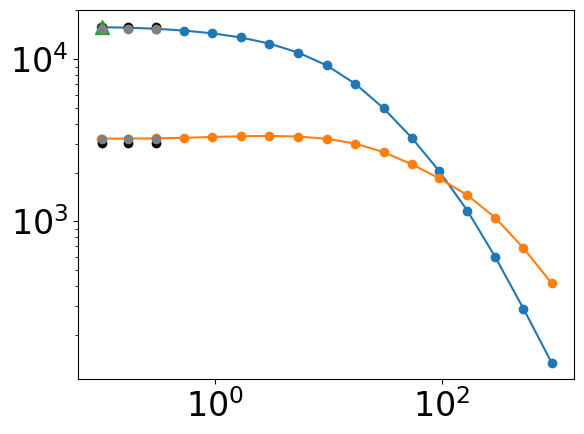

In [29]:
plt.loglog(data_exp_strswp[0][0], data_exp_strswp[0][1], marker='o')
plt.loglog(data_exp_strswp[0][0], data_exp_strswp[0][2], marker='o')
print(params_strfit)

#the ones from the frequency sweep fitting
G1mod, G2mod = fitting_func_SAOS_freq_and_strain(params_frfit[7], 0.001,\
                        freqvals_frfit[7],cycles,ntimesteps_cycle)
plt.plot(0.1,G1mod[0], color='black', marker='o' )
plt.plot(0.1,G2mod[0], color='black', marker='o' )

plt.plot(0.17,G1mod[0], color='black', marker='o' )
plt.plot(0.17,G2mod[0], color='black', marker='o' )

plt.plot(0.3,G1mod[0], color='black', marker='o' )
plt.plot(0.3,G2mod[0], color='black', marker='o' )

#the experiental data from teh frequency sweep at strain 0.01
plt.plot(0.1,data_exp_frswp[0][1][6], marker='^', markersize=10)

for k in range(0,len(strain_lin)):
    G1mod, G2mod = fitting_func_SAOS_freq_and_strain(params_strfit[0], strain_lin[k],\
                            freqvals_str[0],cycles,ntimesteps_cycle)
    plt.plot(strain_lin[k]*100,G1mod[0], color='gray', marker='o' )
    plt.plot(strain_lin[k]*100,G2mod[0], color='gray', marker='o' )



#conclusion is that strain of 1% is too much to do a frequency sweep.
#The preeiction from the amplitude sweep seems more accurate at this point. 
#fitting G' and G'' gives quite accurate solutions. 

#To do
# -error extraction
# -more frequency sweeps at lower amplitude
# -nice ploting
# -waveform data prediction from the parameters



### Error estimation in parameters

In [30]:
variation = np.linspace(0.05,1,500)        
p= 2
n= 3
F= 199.5
right_hand_side = (p / (n-p)) * F
print(right_hand_side)

theta0 = params_strfit[0]
for p in range(0,len(theta0)):    
    for var in variation:
        theta =  copy.deepcopy(theta0)
        theta[p] = theta[p]*(1+var/100)

        #calculate S
        S = sum_of_squared_residuals_lin_modulus(params_actual=theta, strain_lin=strain_lin, freqvals=freqvals_str, freq=freqvals_str[0], \
                                                    ntimesteps_cycle=ntimesteps_cycle, cycles=cycles, data_exp_frswp=data_exp_strswp_avg)

        left_hand_side = (S - objfunval_stffit[0]) / objfunval_stffit[0]
        #print(left_hand_side)

        if left_hand_side > right_hand_side:
            print(f'percentage where 95% conf interval is exceeded: {var}')
            break

        if var == variation[len(variation)-1]:
            print(f'increase the upper limit for variation for param {p}')

399.0
percentage where 95% conf interval is exceeded: 0.5107214428857715
percentage where 95% conf interval is exceeded: 0.7620240480961924


# LAOS Fitting

## With 5 Parameters Adjustment

In [31]:
#List of inputs to take as initial guess
tau_y_log=[0.5] 
nexp=[0.5]   
alpha=[0.5] 
gammadot_cr_log=[0.5] 
I1c_log=[0.5] 


#Set Inputs for the optimization
strain_values_perc_nonlin = [120,100,50,30,15,10,5]
strain_values_nonlin = np.divide(strain_values_perc_nonlin,100) #strain should be actual not percentage

freqvals = [2,4,8]
cycles = 20
eta_inf = 1e-9
ntimesteps_cycle = 256

#Bounds
bounds_tauy = [2,4] #log
bounds_nexp = [0.1, 0.8] #linear
bounds_alpha =  [0.1, 0.8] #linear
bounds_gammadotcr = [-2,3] #log
bounds_I1c = [-4,3] #log
bounds_tauy_n = (0,1)
bounds_nexp_n = (0,1)
bounds_alpha_n =  (0,1)
bounds_gammadotcr_n = (0,1)
bounds_I1c_n = (0,1)

bounds_nonlin_norm = [ bounds_tauy, bounds_nexp, bounds_alpha, bounds_gammadotcr, bounds_I1c ] 
bounds_nonlin = [ bounds_tauy_n, bounds_nexp_n, bounds_alpha_n, bounds_gammadotcr_n, bounds_I1c_n ] 
init_guess = [tau_y_log[0], nexp[0], alpha[0], gammadot_cr_log[0],I1c_log[0] ]

opt_par_nonlin, objfuncval_nonlin, resultnonlin_nonlin = optimization_nonlin_together(initial_guess_nonlin=init_guess, \
                    bounds_nonlin_norm = bounds_nonlin_norm,\
                    strain_values_nonlin=strain_values_nonlin,\
                    freq=freqvals,cycles=cycles,eta_inf=eta_inf,ntimesteps_cycle=ntimesteps_cycle, col_index_stress=1, \
                    all_data=data_exp_avg,\
                    optimized_params_lin= [mod_opt, tr_opt])
        
objfuncval_nonlin_array = [objfuncval_nonlin]

rm: strain_sweep.txt: No such file or directory


Minimization is finished successfully for the non-linear region


In [32]:
print(opt_par_nonlin)
opt_par_all = []
for m in range(0,len(opt_par_nonlin)):
    par = opt_par_nonlin[m]
    boun = bounds_nonlin_norm[m]
    newpar = par * (boun[1]-boun[0])+boun[0]

    if m==0 or m == 3 or m==4 :
        newpar = 10**(newpar)

    opt_par_all.append(newpar)

print(opt_par_all)


[0.66936807 0.99984542 0.31930424 0.83284241 0.35696586]
[2181.4042054914166, 0.7998917933270107, 0.32351297107922716, 145.95266755893914, 0.031532691802055056]


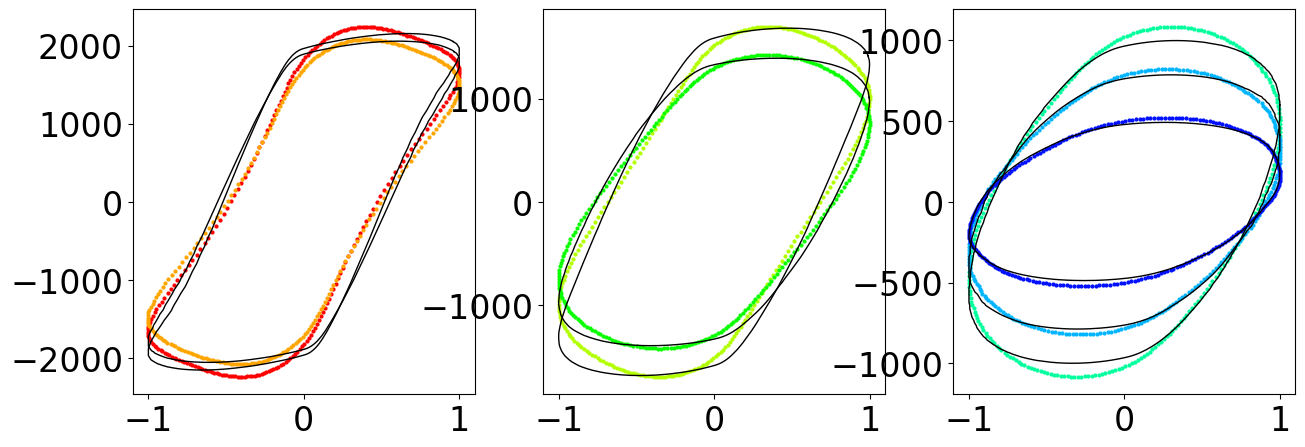

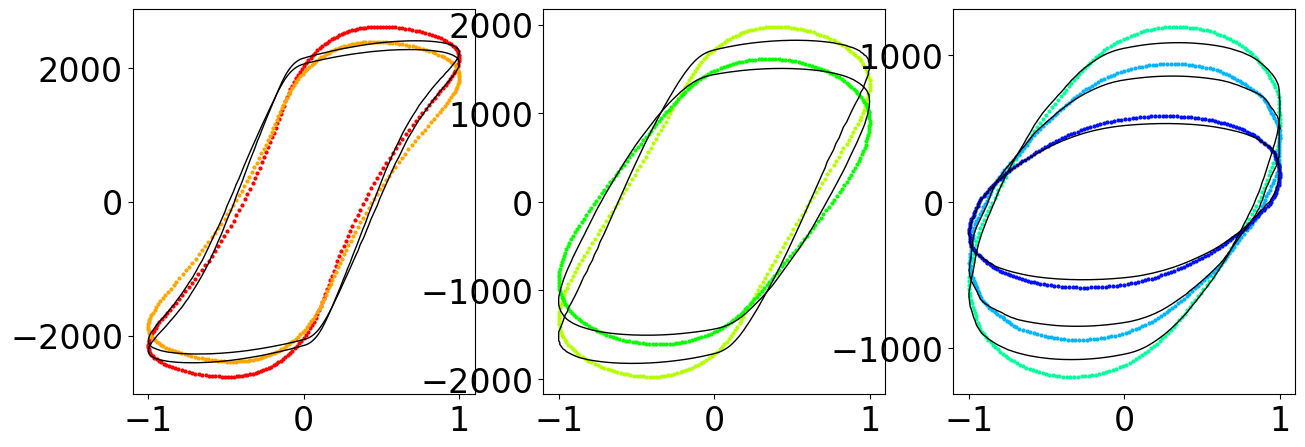

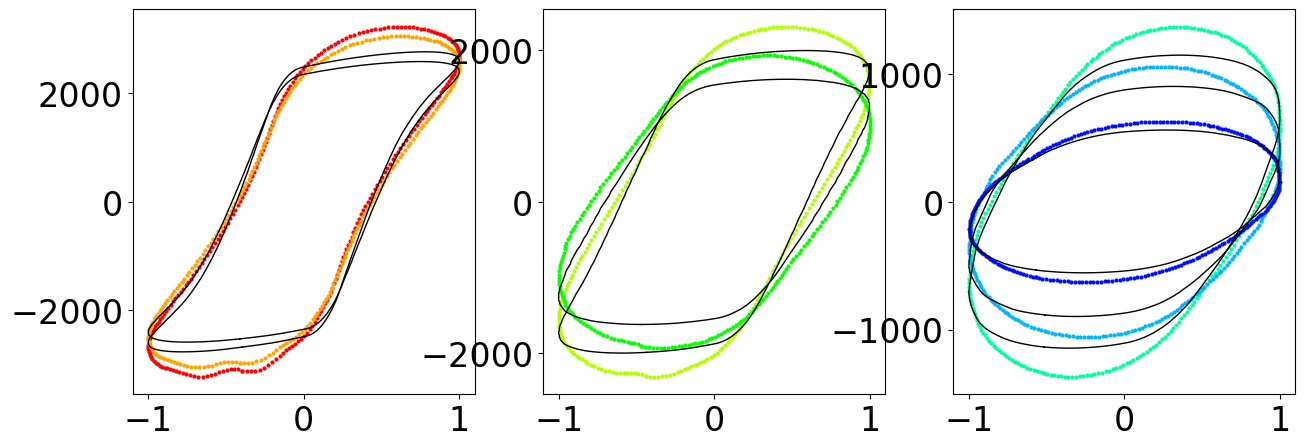

In [33]:
#convert back to units

opt_par_all = []
for m in range(0,len(opt_par_nonlin)):
    par = opt_par_nonlin[m]
    boun = bounds_nonlin_norm[m]
    newpar = par * (boun[1]-boun[0])+boun[0]

    if m==0 or m == 3 or m==4 :
        newpar = 10**(newpar)

    opt_par_all.append(newpar)



data_pred_all = []
for freqval in freqvals:
    
    modulus = mod_opt[0]*freqval**mod_opt[1]
    trel = tr_opt[0]*freqval**tr_opt[1]

    if freqval == 2 : freqindex = 0
    if freqval == 4 : freqindex = 1
    if freqval == 8 : freqindex = 2
    
    data_pred = fitting_func_LAOS(opt_par_all, strain_values_nonlin,\
                      freqval,cycles,eta_inf,ntimesteps_cycle, modulus, trel, data_exp=data_exp_avg, freqindex=freqindex)
    data_pred_all.append(data_pred)


for k in range(0,len(freqvals)):
    fig, axs = plt.subplots(1,3, figsize=(15, 5))
    color_palette = plt.cm.hsv(np.linspace(0, 1, 10))

    for i in range(0,7):
        x1 = data_exp_avg[i+k*7][3][-257:]
        y1 = data_exp_avg[i+k*7][1][-257:]

        if i < 2:
            # Plot data in the first subplot
            axs[0].plot(np.divide(x1,max(x1)), y1, marker='o', color=color_palette[i%7], label='Data 1', markersize=2, linewidth =0)

        if 2 <= i < 4:
            # Plot data in the first subplot
            axs[1].plot(np.divide(x1,max(x1)), y1, marker='o', color=color_palette[i%7], label='Data 1', markersize=2, linewidth =0)

        if  4 <= i:
            # Plot data in the first subplot
            axs[2].plot(np.divide(x1,max(x1)), y1, marker='o', color=color_palette[i%7], label='Data 1', markersize=2, linewidth =0)

    for i in range(0,7):
        x1 = data_exp_avg[i+k*7][3][-257:]
        y1 = data_pred_all[k][i][1][-257:]

        if i < 2:
            # Plot data in the first subplot
            axs[0].plot(np.divide(x1,max(x1)), y1, color='black', label='Data 1', markersize=2, linewidth =1)

        if 2 <= i < 4:
            # Plot data in the first subplot
            axs[1].plot(np.divide(x1,max(x1)), y1,color='black', label='Data 1', markersize=2, linewidth =1)

        if  4 <= i:
            # Plot data in the first subplot
            axs[2].plot(np.divide(x1,max(x1)), y1, color='black', label='Data 1', markersize=2, linewidth =1)

Errorbar calculation

In [34]:
variation = np.linspace(0.05,25,10)        
p= 5
n= 257 * 7 
F= 2.21
right_hand_side = (p / (n-p)) * F
print(right_hand_side)

error_allfitting_perc = []

theta0 = opt_par_all
for p in [0,1,2,3,4]:    
        for var in variation:
            theta =  copy.deepcopy(theta0)
            theta[p] = theta[p]*(1+var/100)

            #calculate S
            S = sum_of_squared_residuals_laos(theta, strain_values_nonlin, freqvals, cycles, eta_inf, ntimesteps_cycle,\
                                    col_index_stress=1, all_data=data_exp_avg, optimized_params_lin=[mod_opt, tr_opt] )

            left_hand_side = (S - objfuncval_nonlin) / objfuncval_nonlin
            #print(left_hand_side)

            if left_hand_side > right_hand_side:
                print(f'param:{p} - percentage where 95% conf interval is exceeded: {var:2.2f}%')
                error_allfitting_perc.append(var)
                break

            if var == variation[len(variation)-1]:
                print(f'increase the upper limit for variation for param {p}')

            

0.006159420289855073
param:0 - percentage where 95% conf interval is exceeded: 2.82%
param:1 - percentage where 95% conf interval is exceeded: 11.14%
param:2 - percentage where 95% conf interval is exceeded: 5.59%
param:3 - percentage where 95% conf interval is exceeded: 13.91%
param:4 - percentage where 95% conf interval is exceeded: 8.37%


In [35]:
print(error_allfitting_perc)

[2.822222222222222, 11.13888888888889, 5.594444444444444, 13.911111111111111, 8.366666666666667]


## With Herschel Bulkley Parameters Given

In [36]:
#List of inputs to take as initial guess
alpha=[0.5] 
I1c_log=[0.5] 

#Set Inputs for the optimization
strain_values_perc_nonlin = [120,100,50,30,15,10,5]
strain_values_nonlin = np.divide(strain_values_perc_nonlin,100) #strain should be actual not percentage

freqvals = [2,4,8]
cycles = 20
eta_inf = 1e-9
ntimesteps_cycle = 256

#Bounds
bounds_alpha =  [0.1, 0.8] #linear
bounds_I1c = [-5,3] #log

bounds_alpha_n =  (0,1)
bounds_I1c_n = (0,1)

bounds_nonlin_norm_hb = [  bounds_alpha, bounds_I1c ] 
bounds_nonlin_hb = [ bounds_alpha_n, bounds_I1c_n ] 

init_guess_hb = [alpha[0], I1c_log[0] ]
opt_parHBlaos, objfuncvalHBlaos, resultnonlinHBlaos = optimization_nonlin_HBgiven(initial_guess_nonlin=init_guess_hb, HBparam = HBparam_laos, \
                    bounds_nonlin_norm = bounds_nonlin_norm_hb,\
                    strain_values_nonlin=strain_values_nonlin,\
                    freq=freqvals,cycles=cycles,eta_inf=eta_inf,ntimesteps_cycle=ntimesteps_cycle, col_index_stress=1, \
                    all_data=data_exp_avg,\
                    optimized_params_lin= [mod_opt, tr_opt])


opt_parHBst, objfuncvalHBst, resultnonlinHBst = optimization_nonlin_HBgiven(initial_guess_nonlin=init_guess_hb, HBparam = HBparam_steady, \
                    bounds_nonlin_norm = bounds_nonlin_norm_hb,\
                    strain_values_nonlin=strain_values_nonlin,\
                    freq=freqvals,cycles=cycles,eta_inf=eta_inf,ntimesteps_cycle=ntimesteps_cycle, col_index_stress=1, \
                    all_data=data_exp_avg,\
                    optimized_params_lin= [mod_opt, tr_opt])

print(resultnonlinHBst)
print(resultnonlinHBlaos)




       message: Optimization terminated successfully.
       success: True
        status: 0
           fun: 121.52601087077092
             x: [ 4.417e-01  4.246e-01]
           nit: 36
          nfev: 73
 final_simplex: (array([[ 4.417e-01,  4.246e-01],
                       [ 4.418e-01,  4.246e-01],
                       [ 4.417e-01,  4.246e-01]]), array([ 1.215e+02,  1.215e+02,  1.215e+02]))
       message: Optimization terminated successfully.
       success: True
        status: 0
           fun: 46.99937978204504
             x: [ 3.377e-01  4.358e-01]
           nit: 35
          nfev: 74
 final_simplex: (array([[ 3.377e-01,  4.358e-01],
                       [ 3.377e-01,  4.358e-01],
                       [ 3.377e-01,  4.358e-01]]), array([ 4.700e+01,  4.700e+01,  4.700e+01]))


In [37]:
objfuncvalHBst_array = [objfuncvalHBst]
objfuncvalHBlaos_array = [objfuncvalHBlaos]

[1001.3794899497004, 0.3024060656589302, 0.33639501662485405, 2.600346731143198, 0.030658475253854532]
[847.4029589060317, 0.28664606824972405, 0.40921519055276345, 0.13569066249805056, 0.024940958391235512]
[2181.4042054914166, 0.7998917933270107, 0.32351297107922716, 145.95266755893914, 0.031532691802055056]


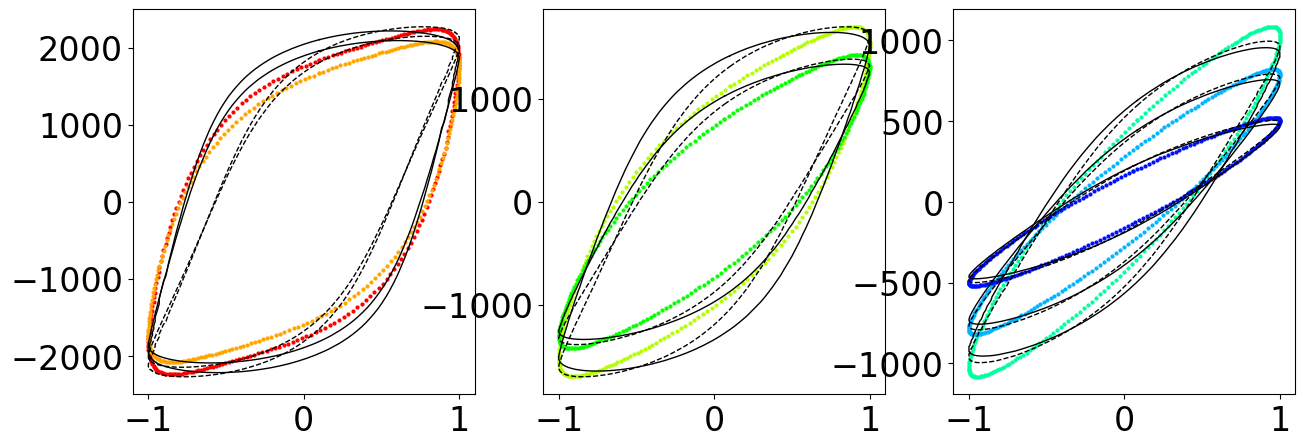

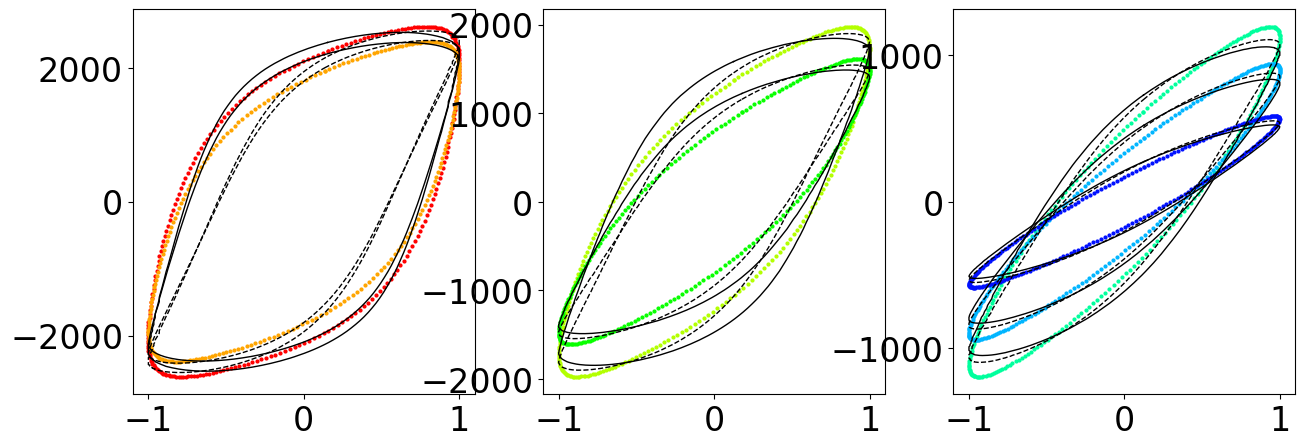

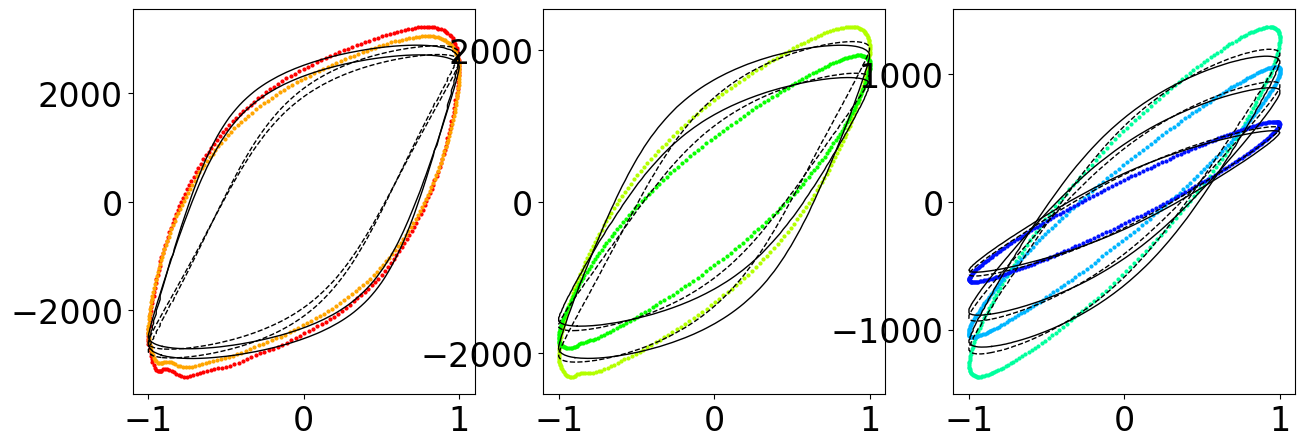

In [38]:
#convert back to units

opt_par_newlaos = []
for m in range(0,len(opt_parHBlaos)):
    par = opt_parHBlaos[m]
    boun = bounds_nonlin_norm_hb[m]
    newpar = par * (boun[1]-boun[0])+boun[0]
    if m==1 :
        newpar = 10**(newpar)
    opt_par_newlaos.append(newpar)

opt_par_newst = []
for m in range(0,len(opt_parHBst)):
    par = opt_parHBst[m]
    boun = bounds_nonlin_norm_hb[m]
    newpar = par * (boun[1]-boun[0])+boun[0]
    if m==1 :
        newpar = 10**(newpar)
    opt_par_newst.append(newpar)


opt_par_HBgiven_laos = [HBparam_laos[0], HBparam_laos[1], opt_par_newlaos[0], HBparam_laos[2], opt_par_newlaos[1]]
opt_par_HBgiven_st = [HBparam_steady[0], HBparam_steady[1], opt_par_newst[0], HBparam_steady[2], opt_par_newst[1]]
print(opt_par_HBgiven_laos)
print(opt_par_HBgiven_st)
print(opt_par_all)

data_pred_all_HBlaos = []
data_pred_all_HBst = []
for freqval in freqvals:
    
    modulus = mod_opt[0]*freqval**mod_opt[1]
    trel = tr_opt[0]*freqval**tr_opt[1]

    if freqval == 2 : freqindex = 0
    if freqval == 4 : freqindex = 1
    if freqval == 8 : freqindex = 2
    
    data_pred_laos = fitting_func_LAOS(opt_par_HBgiven_laos, strain_values_nonlin,\
                      freqval,cycles,eta_inf,ntimesteps_cycle, modulus, trel, data_exp=data_exp_avg, freqindex=freqindex)
    data_pred_all_HBlaos.append(data_pred_laos)

    data_pred_st = fitting_func_LAOS(opt_par_HBgiven_st, strain_values_nonlin,\
                      freqval,cycles,eta_inf,ntimesteps_cycle, modulus, trel, data_exp=data_exp_avg, freqindex=freqindex)
    data_pred_all_HBst.append(data_pred_st)

for k in range(0,len(freqvals)):
    fig, axs = plt.subplots(1,3, figsize=(15, 5))
    color_palette = plt.cm.hsv(np.linspace(0, 1, 10))

    for i in range(0,7):
        x1 = data_exp_avg[i+k*7][2][-257:]
        y1 = data_exp_avg[i+k*7][1][-257:]

        if i < 2:
            # Plot data in the first subplot
            axs[0].plot(np.divide(x1,max(x1)), y1, marker='o', color=color_palette[i%7], label='Data 1', markersize=2, linewidth =0)

        if 2 <= i < 4:
            # Plot data in the first subplot
            axs[1].plot(np.divide(x1,max(x1)), y1, marker='o', color=color_palette[i%7], label='Data 1', markersize=2, linewidth =0)

        if  4 <= i:
            # Plot data in the first subplot
            axs[2].plot(np.divide(x1,max(x1)), y1, marker='o', color=color_palette[i%7], label='Data 1', markersize=2, linewidth =0)

    for i in range(0,7):
        x1 = data_exp_avg[i+k*7][2][-257:]
        y1 = data_pred_all_HBlaos[k][i][1][-257:]

        if i < 2:
            # Plot data in the first subplot
            axs[0].plot(np.divide(x1,max(x1)), y1, color='black', label='Data 1', markersize=2, linewidth =1)

        if 2 <= i < 4:
            # Plot data in the first subplot
            axs[1].plot(np.divide(x1,max(x1)), y1,color='black', label='Data 1', markersize=2, linewidth =1)

        if  4 <= i:
            # Plot data in the first subplot
            axs[2].plot(np.divide(x1,max(x1)), y1, color='black', label='Data 1', markersize=2, linewidth =1)

    for i in range(0,7):
        x1 = data_exp_avg[i+k*7][2][-257:]
        y1 = data_pred_all_HBst[k][i][1][-257:]

        if i < 2:
            # Plot data in the first subplot
            axs[0].plot(np.divide(x1,max(x1)), y1, color='black', label='Data 1', markersize=2, linewidth =1, linestyle='--')

        if 2 <= i < 4:
            # Plot data in the first subplot
            axs[1].plot(np.divide(x1,max(x1)), y1,color='black', label='Data 1', markersize=2, linewidth =1, linestyle='--')

        if  4 <= i:
            # Plot data in the first subplot
            axs[2].plot(np.divide(x1,max(x1)), y1, color='black', label='Data 1', markersize=2, linewidth =1, linestyle='--')





Errorbar Calculation

In [39]:
variation = np.linspace(0.05,10,100)        
p= 2
n= 257 * 7 
F= 3.00 #for 
right_hand_side = (p / (n-p)) * F
print(right_hand_side)

error_HBLAOS_perc = []
theta0 = opt_par_HBgiven_laos
for p in [2,4]:    
        for var in variation:
            theta =  copy.deepcopy(theta0)
            theta[p] = theta[p]*(1+var/100)

            #calculate S
            S = sum_of_squared_residuals_laos(theta, strain_values_nonlin, freqvals, cycles, eta_inf, ntimesteps_cycle,\
                                    col_index_stress=1, all_data=data_exp_avg, optimized_params_lin=[mod_opt, tr_opt] )

            left_hand_side = (S - objfuncvalHBlaos) / objfuncvalHBlaos

            if left_hand_side > right_hand_side:
                print(f'param:{p} - percentage where 95% conf interval is exceeded: {var:2.2f}%')
                error_HBLAOS_perc.append(var)
                break

            if var == variation[len(variation)-1]:
                print(f'increase the upper limit for variation for param {p}')

error_HBST_perc = []
theta0 = opt_par_HBgiven_st
for p in [2,4]:    
        for var in variation:
            theta =  copy.deepcopy(theta0)
            theta[p] = theta[p]*(1+var/100)

            #calculate S
            S = sum_of_squared_residuals_laos(theta, strain_values_nonlin, freqvals, cycles, eta_inf, ntimesteps_cycle,\
                                    col_index_stress=1, all_data=data_exp_avg, optimized_params_lin=[mod_opt, tr_opt] )

            left_hand_side = (S - objfuncvalHBst) / objfuncvalHBst

            if left_hand_side > right_hand_side:
                print(f'param:{p} - percentage where 95% conf interval is exceeded: {var:2.2f}%')
                error_HBST_perc.append(var)
                break

            if var == variation[len(variation)-1]:
                print(f'increase the upper limit for variation for param {p}')



0.00333889816360601
param:2 - percentage where 95% conf interval is exceeded: 3.37%
param:4 - percentage where 95% conf interval is exceeded: 6.08%
param:2 - percentage where 95% conf interval is exceeded: 2.36%
param:4 - percentage where 95% conf interval is exceeded: 6.08%


In [40]:
print(error_HBST_perc)
print(error_HBLAOS_perc)

[2.3616161616161615, 6.08030303030303]
[3.3666666666666663, 6.08030303030303]


## With 5 Param + separate for each frequency

In [41]:
#List of inputs to take as initial guess
tau_y_log=[0.5] 
nexp=[0.5]   
alpha=[0.5] 
gammadot_cr_log=[0.5] 
I1c_log=[0.5] 


#Set Inputs for the optimization
strain_values_perc_nonlin = [120,100,50,30,15,10,5]
strain_values_nonlin = np.divide(strain_values_perc_nonlin,100) #strain should be actual not percentage

freqvals = [2,4,8]
cycles = 20
eta_inf = 1e-9
ntimesteps_cycle = 256
freqselectlist = [[2],[4],[8]]

#Bounds
bounds_tauy = [2,4] #log
bounds_nexp = [0.1, 0.8] #linear
bounds_alpha =  [0.1, 0.8] #linear
bounds_gammadotcr = [-2,3] #log
bounds_I1c = [-4,3] #log
bounds_tauy_n = (0,1)
bounds_nexp_n = (0,1)
bounds_alpha_n =  (0,1)
bounds_gammadotcr_n = (0,1)
bounds_I1c_n = (0,1)

bounds_nonlin_norm = [ bounds_tauy, bounds_nexp, bounds_alpha, bounds_gammadotcr, bounds_I1c ] 
bounds_nonlin = [ bounds_tauy_n, bounds_nexp_n, bounds_alpha_n, bounds_gammadotcr_n, bounds_I1c_n ] 
init_guess = [tau_y_log[0], nexp[0], alpha[0], gammadot_cr_log[0],I1c_log[0] ]

opt_par_indv_freq = []
objfuncval_indv_freq = []
for freqselect in freqselectlist:
    opt_par_nonlin_sep, objfuncval_nonlin_sep, resultnonlin_nonlin_sep = optimization_nonlin_individualfreq(initial_guess_nonlin=init_guess, \
                        bounds_nonlin_norm = bounds_nonlin_norm,\
                        strain_values_nonlin=strain_values_nonlin,\
                        freq=freqvals,cycles=cycles,eta_inf=eta_inf,ntimesteps_cycle=ntimesteps_cycle, col_index_stress=1, \
                        all_data=data_exp_avg,\
                        optimized_params_lin= [mod_opt, tr_opt], freqselect = freqselect )

    opt_par_all_indv = []
    for m in range(0,len(opt_par_nonlin_sep)):
        par = opt_par_nonlin_sep[m]
        boun = bounds_nonlin_norm[m]
        newpar = par * (boun[1]-boun[0])+boun[0]

        if m==0 or m == 3 or m==4 :
            newpar = 10**(newpar)

        opt_par_all_indv.append(newpar)

    opt_par_indv_freq.append(opt_par_all_indv)
    objfuncval_indv_freq.append(objfuncval_nonlin_sep)
        

rm: strain_sweep.txt: No such file or directory


penalty applied
penalty applied
penalty applied
penalty applied
penalty applied
penalty applied
penalty applied
penalty applied
penalty applied
penalty applied
penalty applied
penalty applied
penalty applied
penalty applied
penalty applied
penalty applied
penalty applied
penalty applied
penalty applied
penalty applied
penalty applied
penalty applied
penalty applied
penalty applied
penalty applied
penalty applied
penalty applied
penalty applied
penalty applied
penalty applied
penalty applied
penalty applied
penalty applied
penalty applied
penalty applied
penalty applied
penalty applied
penalty applied
penalty applied
penalty applied
penalty applied
penalty applied
penalty applied
penalty applied
penalty applied
penalty applied
penalty applied
Minimization is finished successfully for the non-linear region


rm: strain_sweep.txt: No such file or directory


penalty applied
penalty applied
penalty applied
penalty applied
penalty applied
penalty applied
penalty applied
penalty applied
penalty applied
penalty applied
penalty applied
penalty applied
penalty applied
penalty applied
penalty applied
penalty applied
penalty applied
penalty applied
penalty applied
penalty applied
penalty applied
penalty applied
penalty applied
penalty applied
penalty applied
penalty applied
penalty applied
penalty applied
penalty applied
penalty applied
penalty applied
penalty applied
penalty applied
Minimization is finished successfully for the non-linear region


rm: strain_sweep.txt: No such file or directory


penalty applied
penalty applied
penalty applied
penalty applied
penalty applied
penalty applied
penalty applied
penalty applied
penalty applied
penalty applied
penalty applied
penalty applied
penalty applied
penalty applied
penalty applied
penalty applied
penalty applied
penalty applied
penalty applied
penalty applied
penalty applied
penalty applied
penalty applied
penalty applied
penalty applied
penalty applied
penalty applied
penalty applied
penalty applied
penalty applied
penalty applied
penalty applied
penalty applied
penalty applied
penalty applied
penalty applied
penalty applied
penalty applied
penalty applied
penalty applied
penalty applied
penalty applied
Minimization is finished successfully for the non-linear region


16099.59722093588 0.34804536996588364
[1906.8307331598287, 0.34716180179530787, 0.327351705986225, 999.7689658458003, 0.025034372248114944]
17572.377843123497 0.17568018875089506
[2145.386035907806, 0.4220170145690425, 0.3108962300073179, 999.9065417605439, 0.03240105607177478]
19179.88747320646 0.08867673982439545
[1888.6754862129897, 0.11433403543916261, 0.31119566639350627, 999.9447378015226, 0.038397286620589055]


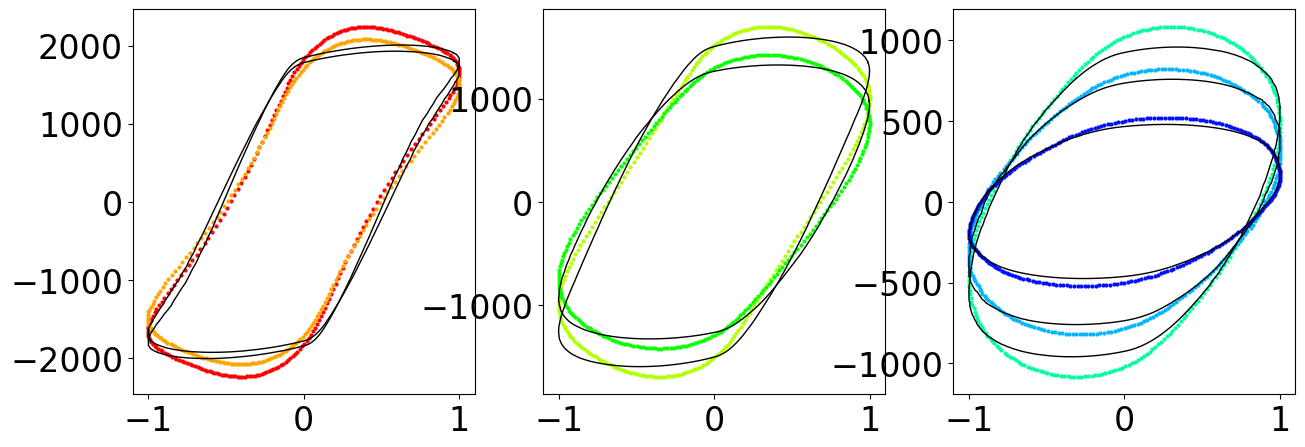

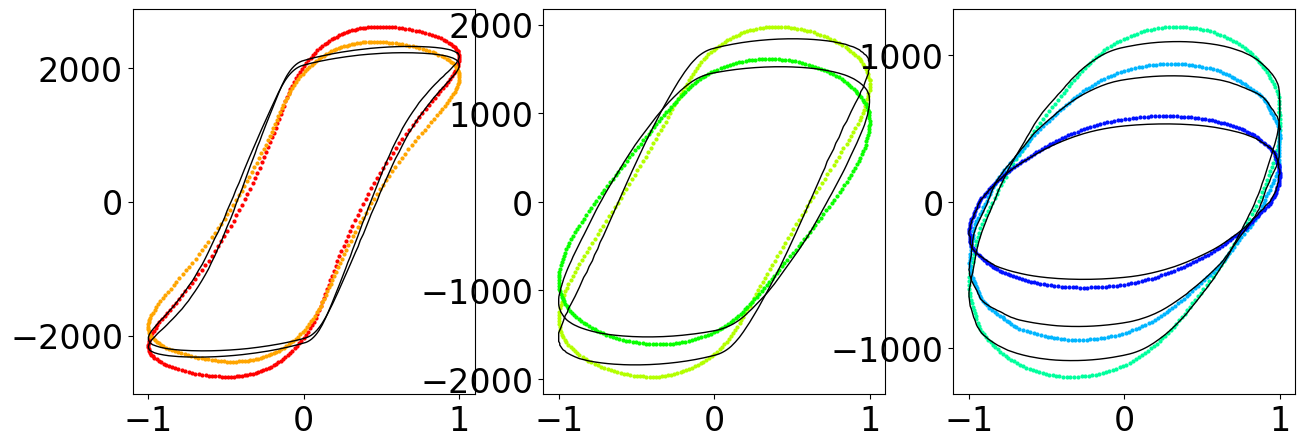

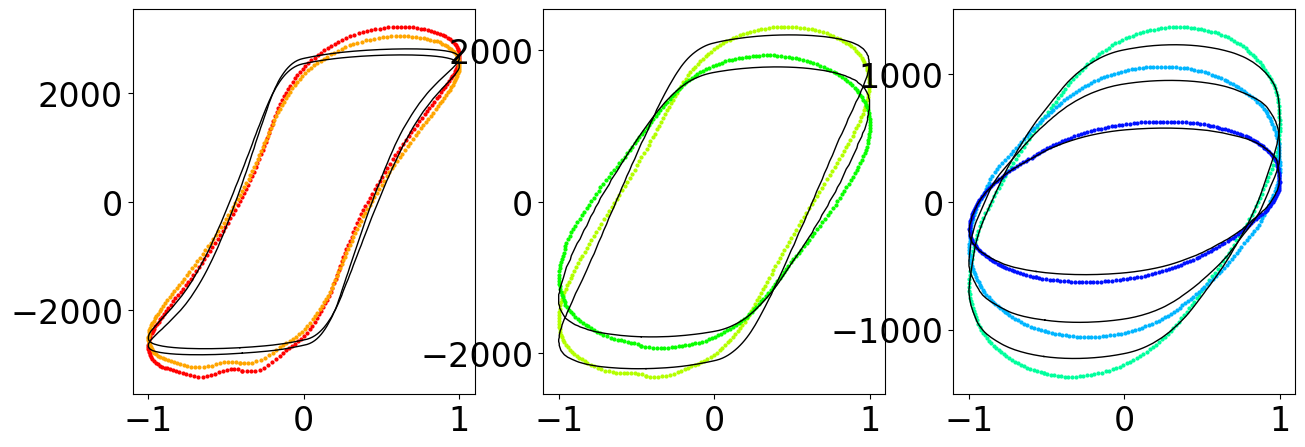

In [42]:
#convert back to units


data_pred_all = []
for freqval in freqvals:
    
    modulus = mod_opt[0]*freqval**mod_opt[1]
    trel = tr_opt[0]*freqval**tr_opt[1]

    if freqval == 2 : freqindex = 0
    if freqval == 4 : freqindex = 1
    if freqval == 8 : freqindex = 2

    print(modulus, trel)
    print(opt_par_indv_freq[freqindex])
    
    data_pred = fitting_func_LAOS(opt_par_indv_freq[freqindex], strain_values_nonlin,\
                      freqval,cycles,eta_inf,ntimesteps_cycle, modulus, trel, data_exp=data_exp_avg, freqindex=freqindex)
    data_pred_all.append(data_pred)


for k in range(0,len(freqvals)):
    fig, axs = plt.subplots(1,3, figsize=(15, 5))
    color_palette = plt.cm.hsv(np.linspace(0, 1, 10))

    for i in range(0,7):
        x1 = data_exp_avg[i+k*7][3][-257:]
        y1 = data_exp_avg[i+k*7][1][-257:]

        if i < 2:
            # Plot data in the first subplot
            axs[0].plot(np.divide(x1,max(x1)), y1, marker='o', color=color_palette[i%7], label='Data 1', markersize=2, linewidth =0)

        if 2 <= i < 4:
            # Plot data in the first subplot
            axs[1].plot(np.divide(x1,max(x1)), y1, marker='o', color=color_palette[i%7], label='Data 1', markersize=2, linewidth =0)

        if  4 <= i:
            # Plot data in the first subplot
            axs[2].plot(np.divide(x1,max(x1)), y1, marker='o', color=color_palette[i%7], label='Data 1', markersize=2, linewidth =0)

    for i in range(0,7):
        x1 = data_exp_avg[i+k*7][3][-257:]
        y1 = data_pred_all[k][i][1][-257:]

        if i < 2:
            # Plot data in the first subplot
            axs[0].plot(np.divide(x1,max(x1)), y1, color='black', label='Data 1', markersize=2, linewidth =1)

        if 2 <= i < 4:
            # Plot data in the first subplot
            axs[1].plot(np.divide(x1,max(x1)), y1,color='black', label='Data 1', markersize=2, linewidth =1)

        if  4 <= i:
            # Plot data in the first subplot
            axs[2].plot(np.divide(x1,max(x1)), y1, color='black', label='Data 1', markersize=2, linewidth =1)

In [43]:
variation = np.linspace(0.01,50,5)        
p= 5
n= 257 
F= 2.21 #for 
right_hand_side = (p / (n-p)) * F

print(right_hand_side)
error_sepfitting_perc = []

for i in range(0,len(opt_par_indv_freq)):
    theta0 = opt_par_indv_freq[i]
    error_temporary = []
    for p in [0,1,2,3,4]:    
        for var in variation:
            theta =  copy.deepcopy(theta0)
            theta[p] = theta[p]*(1-var/100)

            #calculate S
            S = sum_of_squared_residuals_laos_perfreq(theta, strain_values_nonlin, freqvals, cycles, eta_inf, ntimesteps_cycle,\
                                    col_index_stress=1, all_data=data_exp_avg, optimized_params_lin=[mod_opt, tr_opt], freqselect=[freqvals[i]] )
            print(S)
            print(theta)
            #print(objfuncval_indv_freq[i])
            left_hand_side = (S - objfuncval_indv_freq[i]) / objfuncval_indv_freq[i]
            #print(left_hand_side)

            if left_hand_side > right_hand_side:
                print(f'param:{p} - percentage where 95% conf interval is exceeded: {var:2.2f}%')
                error_temporary.append(var)
                break

            if var == variation[len(variation)-1]:
                print(f'increase the upper limit for variation for param {p}')
                error_temporary.append(0)

    error_sepfitting_perc.append(error_temporary)

0.043849206349206346
9.537008817861597
[1906.6400500865127, 0.34716180179530787, 0.327351705986225, 999.7689658458003, 0.025034372248114944]
14.27158690901099
[1668.333879209863, 0.34716180179530787, 0.327351705986225, 999.7689658458003, 0.025034372248114944]
param:0 - percentage where 95% conf interval is exceeded: 12.51%
9.536937396065387
[1906.8307331598287, 0.34712708561512834, 0.327351705986225, 999.7689658458003, 0.025034372248114944]
9.88347037995691
[1906.8307331598287, 0.30374053943575974, 0.327351705986225, 999.7689658458003, 0.025034372248114944]
11.06055949005724
[1906.8307331598287, 0.2603539932563911, 0.327351705986225, 999.7689658458003, 0.025034372248114944]
param:1 - percentage where 95% conf interval is exceeded: 25.01%
9.536794552786244
[1906.8307331598287, 0.34716180179530787, 0.3273189708156264, 999.7689658458003, 0.025034372248114944]
10.020823916065373
[1906.8307331598287, 0.34716180179530787, 0.2864081913599979, 999.7689658458003, 0.025034372248114944]
param:2 -

In [44]:
print(error_sepfitting_perc)

[[12.5075, 25.005000000000003, 12.5075, 50.0, 25.005000000000003], [12.5075, 25.005000000000003, 25.005000000000003, 50.0, 25.005000000000003], [12.5075, 37.5025, 12.5075, 0, 25.005000000000003]]


# Plotting the Data with Predictions

## Steady Shearing 

In [45]:
model_data_steady = []
model_data_steady_last = []
shear_rate_vals = np.logspace(-2,4,30)
freqvals=[2,4,8]

for freqval in freqvals:
     
    modulus = (mod_opt[0]*freqval**mod_opt[1])
    trel = (tr_opt[0]*freqval**tr_opt[1]) 
    #direct fit 5 param
    params_all = [
        modulus,
        trel,
        opt_par_all[0], 
        opt_par_all[1],
        opt_par_all[2],
        opt_par_all[3],
        opt_par_all[4],
        ]
    print(params_all)
    stdat_all = steady_shearing(params_all, shear_rate_vals, eta_inf=eta_inf)
    model_data_steady.append(stdat_all)



    str_sweep_all = []
    for elem in stdat_all:
        str_sweep_all.append(elem[2][-1])


    #laos predicted HB param fit
    params_HB_laos= [
        modulus,
        trel,
        opt_par_HBgiven_laos[0],
        opt_par_HBgiven_laos[1],
        opt_par_HBgiven_laos[2],
        opt_par_HBgiven_laos[3],
        opt_par_HBgiven_laos[4],
        ]
    print(params_HB_laos)
    stdat_HB_laos = steady_shearing(params_HB_laos, shear_rate_vals, eta_inf=eta_inf)
    model_data_steady.append(stdat_HB_laos)


    str_sweep_HB_laos = []
    for elem in stdat_HB_laos:
        str_sweep_HB_laos.append(elem[2][-1])

    #st shear predicted HB param fit
    params_HB_st= [
        modulus,
        trel,
        opt_par_HBgiven_st[0],
        opt_par_HBgiven_st[1],
        opt_par_HBgiven_st[2],
        opt_par_HBgiven_st[3],
        opt_par_HBgiven_st[4],
        ]
    print(params_HB_st)
    stdat_HB_st = steady_shearing(params_HB_st, shear_rate_vals, eta_inf=eta_inf)
    model_data_steady.append(stdat_HB_st)

    str_sweep_HB_st = []
    for elem in stdat_HB_st:
        str_sweep_HB_st.append(elem[2][-1])

         
    model_data_steady_last.append(str_sweep_all)
    model_data_steady_last.append(str_sweep_HB_laos)
    model_data_steady_last.append(str_sweep_HB_st)


    


[16099.59722093588, 0.34804536996588364, 2181.4042054914166, 0.7998917933270107, 0.32351297107922716, 145.95266755893914, 0.031532691802055056]
[16099.59722093588, 0.34804536996588364, 1001.3794899497004, 0.3024060656589302, 0.33639501662485405, 2.600346731143198, 0.030658475253854532]
[16099.59722093588, 0.34804536996588364, 847.4029589060317, 0.28664606824972405, 0.40921519055276345, 0.13569066249805056, 0.024940958391235512]
[17572.377843123497, 0.17568018875089506, 2181.4042054914166, 0.7998917933270107, 0.32351297107922716, 145.95266755893914, 0.031532691802055056]
[17572.377843123497, 0.17568018875089506, 1001.3794899497004, 0.3024060656589302, 0.33639501662485405, 2.600346731143198, 0.030658475253854532]
[17572.377843123497, 0.17568018875089506, 847.4029589060317, 0.28664606824972405, 0.40921519055276345, 0.13569066249805056, 0.024940958391235512]
[19179.88747320646, 0.08867673982439545, 2181.4042054914166, 0.7998917933270107, 0.32351297107922716, 145.95266755893914, 0.031532691

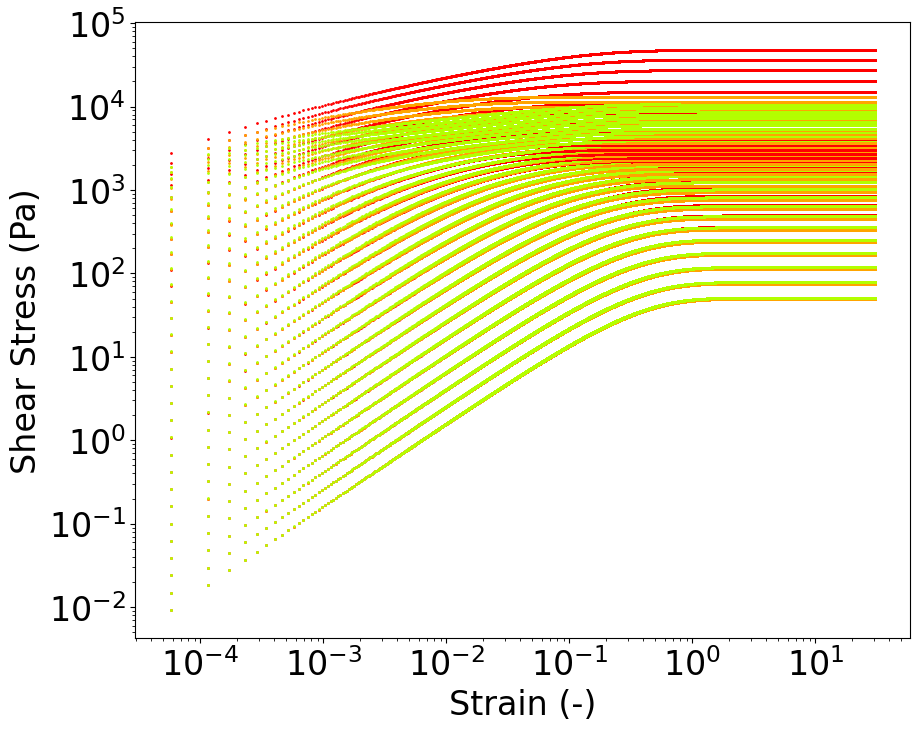

In [46]:
color_palette2 = plt.cm.hsv(np.linspace(0, 1, 10))
color_palette3 = plt.cm.hsv(np.linspace(0,1 ,10))

fig, ax = plt.subplots( figsize=(10,8))

font = {'family' : 'arial',
        'weight' : 'bold',
        'size'   : 18}

plt.rcParams.update({'font.size': 18})

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Strain (-)')
ax.set_ylabel('Shear Stress (Pa)')

for shearrate in range(0,len(shear_rate_vals)):

        x = model_data_steady[0][shearrate][0] #time
        y_all = model_data_steady[0][shearrate][2]  #stress
        y_hblaos = model_data_steady[1][shearrate][2]  #stress
        y_hbst = model_data_steady[2][shearrate][2]  #stress

        ax.errorbar(x, y_all, xerr=None, yerr=None, label=None,\
                        color=color_palette3[0],\
                linewidth=0, marker='o', markersize=1, alpha=1, linestyle='-')
        ax.errorbar(x, y_hblaos, xerr=None, yerr=None, label=None,\
                        color=color_palette3[1],\
                linewidth=0, marker='o', markersize=1, alpha=1, linestyle='-')
        ax.errorbar(x, y_hbst, xerr=None, yerr=None, label=None,\
                        color=color_palette3[2],\
                linewidth=0, marker='o', markersize=1, alpha=1, linestyle='-')

LAOS fitted HB: TAU - n - dotgammacr : [1001.3794899497004, 0.3024060656589302, 2.600346731143198]
Steady fitted HB: TAU - n - dotgammacr : [847.4029589060317, 0.28664606824972405, 0.13569066249805056]


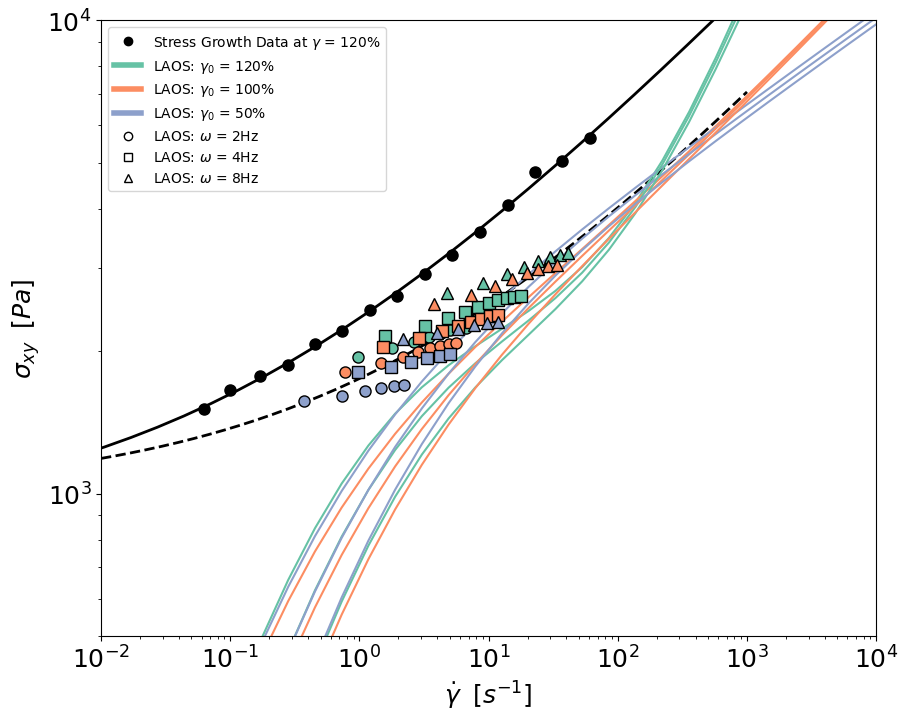

In [47]:
# Figure settings
color_palette_grays = plt.cm.Grays(np.linspace(0.1,1, 4))
color_palette = plt.cm.Set2(np.linspace(0, 1, 7))
markersize=10

fig, axs = plt.subplots(figsize=(10, 8))
axs.set_xscale('log')
axs.set_yscale('log')

axs.set_xlim(0.01,10000)
axs.set_ylim(500,10000)

axs.set_xlabel("$\dot{{\gamma}}\;\;[s^{-1}]$")
axs.set_ylabel("$\sigma_{xy}\;\;[Pa]$")


#Steady shearing data
stresses = []
target_strains = [120]
for target_strain in target_strains:
    stress = shear_rate_sweep(target_strain, data_exp_stgrw_avg, i_strain=1, i_stress=2)
    stresses.append(stress)

shear_rates = [0.063, 0.1, 0.17, 0.28, 0.45, 0.73, 1.2,\
                1.96, 3.21, 5.25, 8.58, 14,23,37,61]

i=0
for stress in stresses:
    axs.errorbar(shear_rates[0:], stress[0:], marker='o', linewidth=0, markersize = 8, color='black', markeredgecolor='black' )
    popt_steady, pconv_steady = curve_fit(HB, shear_rates[0:], stress[0:], p0=[1000, 10, 0.2] )
    dot_gammacr_steady = (popt_steady[0] / (popt_steady[1]))**(1/popt_steady[2])
    perr_steady = np.sqrt(np.diag(pconv_steady))
    model_data_HB_steady = HB(np.logspace(-3,5,40), popt_steady[0],popt_steady[1],popt_steady[2])
    plt.plot(np.logspace(-3,5,40),model_data_HB_steady,  linewidth=2, color='black')
    i+=1

HBparam_steady = [popt_steady[0],  popt_steady[2], dot_gammacr_steady]


#Data Analysis for Extractting Flow from LAOS

x_shr,y_str = extract_steady_from_laos(data_exp_avg)

hbfit_x = []
hbfit_y = []
skip_first = 3
for i in [0,1,2,7,8,9,14,15,16]: #highest amplitudes from each 3 frequency
    x = x_shr[i][skip_first:] ; y=y_str[i][skip_first:]
    
    if i in [0,1,2]:
        xplt = [] ; yplt = []
        for k in range(0,len(x)): 
            if k%3 == 0: 
                xplt.append(x[k])
                yplt.append(y[k])
        axs.errorbar(xplt, yplt, marker='o', linewidth=0, markersize = 8, color=color_palette[i%7], markeredgecolor='black' )
    
    if i in [7,8,9]:
        xplt = [] ; yplt = []
        for k in range(0,len(x)): 
            if k%3 == 0: 
                xplt.append(x[k])
                yplt.append(y[k])
        axs.errorbar(xplt, yplt, marker='s', linewidth=0, markersize = 8, color=color_palette[i%7], markeredgecolor='black' )
    
    if i in [14,15,16]:
        xplt = [] ; yplt = []
        for k in range(0,len(x)): 
            if k%3 == 0: 
                xplt.append(x[k])
                yplt.append(y[k])
        axs.errorbar(xplt, yplt, marker='^', linewidth=0, markersize = 8, color=color_palette[i%7], markeredgecolor='black' )
    
    for elem in x_shr[i][skip_first:]: hbfit_x.append(elem)
    for elem in y_str[i][skip_first:]: hbfit_y.append(elem)

popt_laos, pconv_laos= curve_fit(HB, hbfit_x, hbfit_y, p0=[1000, 5, 0.2])
dot_gammacr_laos = (popt_laos[0] / (popt_laos[1]))**(1/popt_laos[2])


model_data = HB(np.logspace(-3,3,50), popt_laos[0],popt_laos[1],popt_laos[2])
plt.plot(np.logspace(-3,3,50), model_data,  linewidth=2, color='black', linestyle='--')

HBparam_laos = [popt_laos[0], popt_laos[2],  dot_gammacr_laos]


custom_lines = [Line2D([0], [0], color='black', lw=0, marker='o',markeredgecolor='black'),
                Line2D([0], [0], color=color_palette[0], lw=4),
                Line2D([0], [0], color=color_palette[1], lw=4),
                Line2D([0], [0], color=color_palette[2], lw=4),
                Line2D([0], [0], color='white', lw=0, marker='o', markeredgecolor='black'),
                Line2D([0], [0], color='white', lw=0, marker='s',markeredgecolor='black'),
                Line2D([0], [0], color='white', lw=0, marker='^',markeredgecolor='black')] 
       
axs.legend(custom_lines, ['Stress Growth Data at $\gamma$ = 120%',\
                           'LAOS: $\gamma_0$ = 120%',\
                           'LAOS: $\gamma_0$ = 100%',\
                           'LAOS: $\gamma_0$ = 50%',\
                           'LAOS: $\omega$ = 2Hz',\
                           'LAOS: $\omega$ = 4Hz',\
                           'LAOS: $\omega$ = 8Hz']
                           , fontsize=10, loc= 'upper left')

print(f'LAOS fitted HB: TAU - n - dotgammacr : {HBparam_laos}')
print(f'Steady fitted HB: TAU - n - dotgammacr : {HBparam_steady}')


#Model predicted

for i in range(0,len(freqvals)*3):
    axs.plot(shear_rate_vals, model_data_steady_last[i], color=color_palette[i%3], linestyle='-')



# custom_lines = [Line2D([0], [0], color='black', lw=0, marker='o',markeredgecolor='black'),
#                 Line2D([0], [0], color=color_palette[0], lw=4),
#                 Line2D([0], [0], color=color_palette[1], lw=4),
#                 Line2D([0], [0], color=color_palette[2], lw=4),
#                 Line2D([0], [0], color='white', lw=0, marker='o', markeredgecolor='black'),
#                 Line2D([0], [0], color='white', lw=0, marker='s',markeredgecolor='black'),
#                 Line2D([0], [0], color='white', lw=0, marker='^',markeredgecolor='black')] 
       
# axs.legend(custom_lines, ['Stress Growth Data at $\gamma$ = 120%',\
#                            'LAOS: $\gamma_0$ = 120%',\
#                            'LAOS: $\gamma_0$ = 100%',\
#                            'LAOS: $\gamma_0$ = 50%',\
#                            'LAOS: $\omega$ = 2Hz',\
#                            'LAOS: $\omega$ = 4Hz',\
#                            'LAOS: $\omega$ = 6Hz']
#                            , fontsize=10, loc= 'upper left')










In [48]:
# color_palette_grays = plt.cm.Grays(np.linspace(0.1,1, 4))
# color_palette = plt.cm.Set2(np.linspace(0, 1, 10))
# markersize=20

# stresses = []
# target_strains = [100]
# for target_strain in target_strains:
#     stress = shear_rate_sweep(target_strain, data_exp_stgrw_avg, i_strain=1, i_stress=2)
#     stresses.append(stress)
# shear_rates = [0.063, 0.1, 0.17, 0.28, 0.45, 0.73, 1.2,\
#                 1.96, 3.21, 5.25, 8.58, 14,23,37,61]

# fig, axs = plt.subplots(figsize=(10, 8))
# axs.set_xscale('log')
# axs.set_yscale('log')

# axs.set_xlim(0.01,1000)
# axs.set_ylim(500,10000)

# axs.set_xlabel("$\dot{{\gamma}}\;\;[s^{-1}]$", fontsize=32)
# axs.set_ylabel("$\sigma_{xy}\;\;[Pa]$", fontsize=32)
# i=0
# for stress in stresses:
#     axs.errorbar(shear_rates[1:], stress[1:], marker='o', linewidth=0, markersize = markersize, color=color_palette[0],\
#                   markeredgecolor='black' )
#     i+=1

# #LAOS Shear Rate
# # 1- Produce the perfect cosine for the shearrate beacuse the one from rheometer a not perfect
# shear_rates = []
# freq = 2 #in Hz
# time = np.linspace(0,0.5,257)
# for strain in strains:
#     perf_shearrate=[]
#     for timeval in time:
#         perf_shearrate_elem = strain*freq*2*math.pi * math.cos(2*math.pi*freq*timeval)
#         perf_shearrate.append(perf_shearrate_elem)
#     shear_rates.append(perf_shearrate)

# plt.plot(time, shear_rates[0])
    


# addlist = [0,10,20,30,40,40,40, 40, 40, 40]
# xdata = []
# ydata = []
# for i in range(0,0):
#     add = addlist[i]

#     x3 = shear_rates[i][0+add:65]
#     y3 = data_exp[i][1][-257*5:-257*4][0+add:65]

#     for x3el in x3: xdata.append(x3el)
#     for y3el in y3: ydata.append(y3el)

#     xplot = []
#     yplot = []
#     for k in range(0,len(x3)):
#         if k%4==0:
#             xplot.append(x3[k])
#             yplot.append(y3[k])
    
#         axs.plot(xplot, yplot, marker='o', color=color_palette[i], markersize=7,\
#                   linewidth =0)


# # plt.plot(np.logspace(-3,3,20),model_data_HB_steady,  linewidth=1, color='red', linestyle='--')
# # plt.plot(np.logspace(-3,3,20),model_data,  linewidth=1, color='red', linestyle='-')

# x = shear_rate_vals
# y_all = model_data_steady_last[0] #stress
# y_hblaos = model_data_steady_last[1]
# y_hbst = model_data_steady_last[2]
        
# axs.errorbar(x[5:], y_all[5:], xerr=None, yerr=None, label=None,\
#                 color=color_palette[0],\
#             linewidth=2, marker='o', markersize=0, alpha=1, linestyle='-')
# # axs.errorbar(x[5:], y_hblaos[5:], xerr=None, yerr=None, label=None,\
# #                 color='red',\
# #             linewidth=2, marker='o', markersize=0, alpha=1, linestyle='--')
# # axs.errorbar(x[5:], y_hbst[5:], xerr=None, yerr=None, label=None,\
# #                 color='red',\
# #             linewidth=2, marker='o', markersize=0, alpha=1, linestyle='-.')
 

# custom_lines = [Line2D([0], [0], color=color_palette[0], lw=0, marker='o',markeredgecolor='black'),
#                 Line2D([0], [0], color=color_palette[0], lw=5),
#                 Line2D([0], [0], color=color_palette_grays[2], lw=0, marker='o',markeredgecolor='black'),
#                 Line2D([0], [0], color=color_palette[8], lw=0, marker='o'),
#                 Line2D([0], [0], color=color_palette[7], lw=0, marker='o'),
#                 Line2D([0], [0], color=color_palette[6], lw=0, marker='o'),
#                 Line2D([0], [0], color=color_palette[5], lw=0, marker='o'),
#                 Line2D([0], [0], color=color_palette[4], lw=0, marker='o'),
#                 Line2D([0], [0], color=color_palette[3], lw=0, marker='o'),
#                 Line2D([0], [0], color=color_palette[2], lw=0, marker='o'),
#                 Line2D([0], [0], color=color_palette[1], lw=0, marker='o'),
#                 Line2D([0], [0], color=color_palette[0], lw=0, marker='o')] 
       
# axs.legend(custom_lines, ['Stress Growth Data at $\gamma$ = 100%', 'Predicted Steady Shear Rate Data'],
#                            fontsize=20, loc= 'lower right')

# custom_lines1 = [ Line2D([0], [0], color=color_palette[0], lw=2),
#                 Line2D([0], [0], color=color_palette[1], lw=2),
#                 Line2D([0], [0], color=color_palette[2], lw=2)] 
       
# # axs.legend(custom_lines1, ['5-parameter fit',\
# #                            '2-parameter fit: flow curve LAOS',\
# #                                   '2-parameter fit: Flow Curve Stress Growth',], fontsize=12, loc= 'lower left')

 

## Osicllatory Shearing

1
[15119.0, 15006.0, 14795.0, 14407.0, 13711.0, 12521.0, 10643.0, 8019.0, 5000.9, 2434.0, 948.34, 336.21, 128.67, 64.267, 47.384, 44.304, 39.637, 29.509, 18.859, 11.047]
2
[15136.0, 15032.0, 14829.0, 14440.0, 13719.0, 12446.0, 10402.0, 7604.9, 4631.3, 2329.5, 1011.3, 403.01, 154.78, 59.232, 23.062, 9.236, 3.819, 1.6291, 0.71472, 0.32143]
3
[15202.0, 15145.0, 15019.0, 14743.0, 14160.0, 13002.0, 10974.0, 8100.9, 5082.4, 2769.6, 1384.6, 666.29, 316.48, 149.53, 70.35, 32.958, 15.375, 7.1435, 3.3067, 1.5256]
1
[16518.0, 16394.0, 16162.0, 15735.0, 14968.0, 13652.0, 11567.0, 8646.6, 5318.3, 2574.7, 1043.1, 415.48, 196.52, 126.7, 104.1, 86.152, 61.909, 39.008, 22.717, 12.692]
2
[16537.0, 16422.0, 16199.0, 15772.0, 14981.0, 13587.0, 11356.0, 8321.9, 5112.4, 2621.6, 1172.5, 485.21, 194.58, 77.952, 31.762, 13.27, 5.6935, 2.5022, 1.122, 0.51127]
3
[16609.0, 16546.0, 16408.0, 16107.0, 15471.0, 14215.0, 12020.0, 8913.1, 5637.8, 3105.0, 1567.6, 759.23, 361.33, 170.45, 79.916, 37.28, 17.315, 8.0114, 3

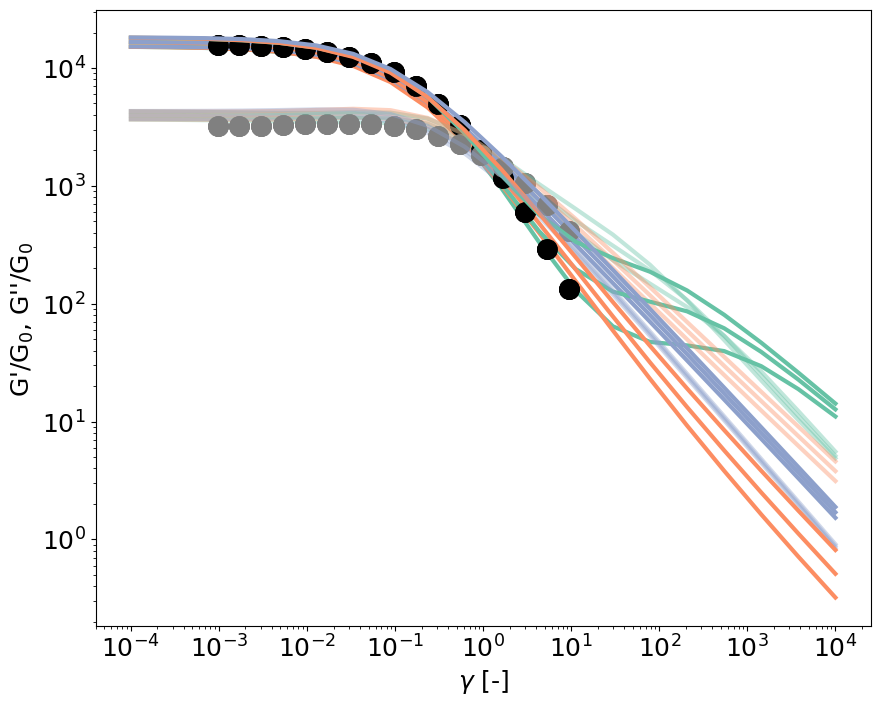

In [49]:
strains = np.divide(data_exp_strswp[0][0],100)
strains = np.logspace(-4,4,20)

fig4, ax = plt.subplots(figsize=(10,8))
font = {'family' : 'arial',
        'weight' : 'bold',
        'size'   : 18}

color_palette = plt.cm.Set2(np.linspace(0, 1, 8))
plt.rcParams.update({'font.size': 18})
markersize = 14

ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlabel('$\gamma$ [-]')
ax.set_ylabel("G'/G$_0$, G''/G$_0$ ")
freqvals=[2,4,8]

for freqval in freqvals:
     
        modulus = mod_opt[0]*freqval**mod_opt[1]
        trel = tr_opt[0]*freqval**tr_opt[1]
        #direct fit 5 param
        params_all_osc = [
        opt_par_all[0],
        opt_par_all[1],
        opt_par_all[2],
        opt_par_all[3],
        opt_par_all[4],
        ]
        params_HB_st_osc= [
        opt_par_HBgiven_st[0],
        opt_par_HBgiven_st[1],
        opt_par_HBgiven_st[2],
        opt_par_HBgiven_st[3],
        opt_par_HBgiven_st[4],
        ]
        params_HB_laos_osc= [
        opt_par_HBgiven_laos[0],
        opt_par_HBgiven_laos[1],
        opt_par_HBgiven_laos[2],
        opt_par_HBgiven_laos[3],
        opt_par_HBgiven_laos[4],
        ]


        if freqval == freqvals[0]: freqindex = 0
        if freqval == freqvals[1]: freqindex = 1
        if freqval == freqvals[2]: freqindex = 2

        data_pred_moduli_comp = fitting_func_LAOS_nodatainput(params_all_osc, strains,\
                        freq=freqval,cycles=20,eta_inf=eta_inf,ntimesteps_cycle=256,\
                        modulus=modulus, t_rel=trel )
        G1pred_all, G2pred_all =  extract_predicted_G1G2(strains)
        print('1')
        print(G1pred_all)


        data_pred_moduli_comp = fitting_func_LAOS_nodatainput(params_HB_laos_osc, strains,\
                        freq=freqval,cycles=20,eta_inf=eta_inf,ntimesteps_cycle=256,\
                        modulus=modulus, t_rel=trel)
        G1pred_HBlaos, G2pred_HBlaos =  extract_predicted_G1G2(strains)
        print('2')
        print(G1pred_HBlaos)

        data_pred_moduli_comp = fitting_func_LAOS_nodatainput(params_HB_st_osc, strains,\
                        freq=freqval,cycles=20,eta_inf=eta_inf,ntimesteps_cycle=256,\
                        modulus=modulus, t_rel=trel)
        G1pred_HBst, G2pred_HBst =  extract_predicted_G1G2(strains)
        print('3')
        print(G1pred_HBst)




        ax.plot(np.divide(data_exp_strswp[0][0],100), np.divide(data_exp_strswp[0][1],1), marker='o', \
                color='black', markeredgecolor='black', markersize=markersize, linewidth=0)
        ax.plot(np.divide(data_exp_strswp[0][0],100), np.divide(data_exp_strswp[0][2],1), marker='o', \
                color='gray', markersize=markersize, linewidth=0)

        ax.plot(strains, np.divide(G1pred_all,1), marker='o',\
                color=color_palette[0],markersize=0, linewidth=3)
        ax.plot(strains, np.divide(G2pred_all,1), marker='o',\
                color=color_palette[0], markersize=0, linewidth=3, alpha=0.4)

        ax.plot(strains, np.divide(G1pred_HBlaos,1), marker='o',\
                color=color_palette[1],markersize=0, linewidth=3)
        ax.plot(strains, np.divide(G2pred_HBlaos,1), marker='o',\
                color=color_palette[1], markersize=0, linewidth=3, alpha=0.4)

        ax.plot(strains, np.divide(G1pred_HBst,1), marker='o',\
                color=color_palette[2],markersize=0, linewidth=3)
        ax.plot(strains, np.divide(G2pred_HBst,1), marker='o',\
                color=color_palette[2], markersize=0, linewidth=3, alpha=0.4)

# custom_lines = [Line2D([0], [0], color='black', lw=0, marker='o'),
#                 Line2D([0], [0], color=color_palette[0], lw=2),
#                 Line2D([0], [0], color=color_palette[1], lw=2),
#                 Line2D([0], [0], color=color_palette[2], lw=2)] 
       
# ax.legend(custom_lines, ['Exp. Data', '5-parameter fit',\
#                            '2-parameter fit: flow curve LAOS',\
#                                   '2-parameter fit: Flow Curve Stress Growth',], fontsize=12, loc= 'lower left')


# Writing the variables out

In [50]:
varname_list = []
for var_name in dir():
    # Skip private/internal variables
    if not var_name.startswith('_'):
        var_value = eval(var_name)
        
        # Check if the variable is a NumPy array (or any other array-like type)
        if isinstance(var_value, (np.ndarray, list)):
            varname_list.append(var_name)

varname_list_sorted = sorted(varname_list)

for k in range(0, len(varname_list_sorted)):
    text = f"'{varname_list_sorted[k]}',"
    print(text)



'G1mod',
'G1pred_HBlaos',
'G1pred_HBst',
'G1pred_all',
'G1rep1',
'G1rep2',
'G2mod',
'G2pred_HBlaos',
'G2pred_HBst',
'G2pred_all',
'G2rep1',
'G2rep2',
'HBparam_laos',
'HBparam_steady',
'I1c_log',
'In',
'alpha',
'array',
'avg',
'avg_elem',
'boun',
'bounds_I1c',
'bounds_alpha',
'bounds_gammadotcr',
'bounds_lin',
'bounds_lin_norm',
'bounds_mod0',
'bounds_nexp',
'bounds_nonlin',
'bounds_nonlin_hb',
'bounds_nonlin_norm',
'bounds_nonlin_norm_hb',
'bounds_tauy',
'bounds_trel0',
'color_palette',
'color_palette2',
'color_palette3',
'color_palette_grays',
'custom_lines',
'data_exp',
'data_exp_avg',
'data_exp_frswp',
'data_exp_frswp_avg',
'data_exp_frswp_waveform_avg',
'data_exp_stgrw',
'data_exp_stgrw_avg',
'data_exp_strswp',
'data_exp_strswp_avg',
'data_pred',
'data_pred_all',
'data_pred_all_HBlaos',
'data_pred_all_HBst',
'data_pred_laos',
'data_pred_moduli_comp',
'data_pred_st',
'data_single_exp',
'elem1',
'elem2',
'elem3',
'elem4',
'err',
'err_mod_freqvalfit',
'err_trel_freqvalfit',
'error_HBL

In [54]:
# using now() to get current time
current_time = datetime.datetime.now()
formatted_time = current_time.strftime('%Y_%m_%d_%H_%M')

export_items= [
'G1mod',
'G1pred_HBlaos',
'G1pred_HBst',
'G1pred_all',
'G1rep1',
'G1rep2',
'G2mod',
'G2pred_HBlaos',
'G2pred_HBst',
'G2pred_all',
'G2rep1',
'G2rep2',
'HBparam_laos',
'HBparam_steady',
'bounds_I1c',
'bounds_alpha',
'bounds_gammadotcr',
'bounds_lin',
'bounds_lin_norm',
'bounds_mod0',
'bounds_nexp',
'bounds_nonlin',
'bounds_nonlin_hb',
'bounds_nonlin_norm',
'bounds_nonlin_norm_hb',
'bounds_tauy',
'bounds_trel0',
'data_exp_avg',
'data_exp_frswp_avg',
'data_exp_frswp_waveform_avg',
'data_exp_stgrw_avg',
'data_exp_strswp_avg',
'data_pred',
'data_pred_all',
'data_pred_all_HBlaos',
'data_pred_all_HBst',
'data_pred_laos',
'data_pred_moduli_comp',
'data_pred_st',
'data_single_exp',
'err',
'err_mod_freqvalfit',
'err_trel_freqvalfit',
'error_HBLAOS_perc',
'error_HBST_perc',
'error_HBlaos',
'error_HBsteady',
'error_allfitting_perc',
'error_sepfitting_perc',
'error_temporary',
'freqselect',
'freqselectlist',
'freqvals',
'freqvals_frfit',
'freqvals_str',
'gammadot_cr_log',
'gammadot_list',
'hbfit_x',
'hbfit_y',
'mod_conv',
'mod_frfit',
'mod_opt',
'model_data',
'model_data_HB_steady',
'model_data_steady',
'model_data_steady_last',
'obj_frfit_waveform',
'objfuncval_nonlin_array',
'objfuncvalHBlaos_array',
'objfuncvalHBst_array',
'objfuncval_indv_freq',
'objfunval_stffit',
'opt_parHBlaos',
'opt_parHBst',
'opt_par_HBgiven_laos',
'opt_par_HBgiven_st',
'opt_par_all',
'opt_par_all_indv',
'opt_par_indv_freq',
'opt_par_newlaos',
'opt_par_newst',
'opt_par_nonlin',
'opt_par_nonlin_sep',
'opt_par_st',
'opt_par_vis',
'opt_par_wave',
'params',
'params_HB_laos',
'params_HB_laos_osc',
'params_HB_st',
'params_HB_st_osc',
'params_all',
'params_all_osc',
'params_frfit',
'params_frfit_waveform',
'params_strfit',
'paramset',
'pconv_laos',
'pconv_steady',
'perr_steady',
'popt_laos',
'popt_steady',
'pred_data',
'shear_rate_vals',
'shear_rates',
'shrates',
'std_all',
'std_elem',
'std_freq_swp',
'std_freqwaveform',
'std_str_swp',
'std_strgrw',
'stdat_HB_laos',
'stdat_HB_st',
'stdat_all',
'stdval',
'str_sweep_HB_laos',
'str_sweep_HB_st',
'str_sweep_all',
'strain_lin',
'strain_values_nonlin',
'strain_values_perc_nonlin',
'strains',
'stress',
'stresses',
'target_strains',
'tau_y_log',
'tr_conv_lin',
'tr_opt',
'trel_frfit'
]

# Open a new file to store variables
with open(f'arrays_protein/arrays_{formatted_time}_humanread.py', 'w') as f:
    for var_name in dir():
        # Skip private/internal variables
        if not var_name.startswith('_'):
            var_value = eval(var_name)
            
            # Check if the variable is a NumPy array (or any other array-like type)
            if isinstance(var_value, (np.ndarray, list)):

                if var_name in export_items:
                    # Write variable assignment to the file
                    text1 = f'{var_name} = {repr(var_value)}'
                    f.write(textwrap.fill(text1, width=80))
                    f.write('\n')

np.savez(f'arrays_protein/arrays_{formatted_time}.npz', **{name: eval(name) for name in export_items})


# for name in export_items:
#     print(f'Saving array: {name}')
#     np.savez(f'arrays_{formatted_time}.npz', **{name: eval(name)})